# **STEP 1: Data Importing and Pre-processing**
## - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used
## - Clean, wrangle, and handle missing data
## - Transform data appropriately using techniques such as aggregation, normalization, and feature construction
## - Reduce redundant data and perform need-based discretization

**1.1 - Import dataset and describe characteristics such as dimensions, data types, file types, and import methods used**

The King County housing dataset was imported using Pandas, and the file was read from a CSV format. A quick look at the first few rows confirmed that the data loaded correctly into a DataFrame. The dataset contains 21,613 rows and 21 columns, which provides a large sample of home sales for analysis. Basic characteristics such as the shape of the dataset and the data types for each column were reviewed to understand the layout of the information. This also confirmed that key variables like price, bedrooms, bathrooms, living area, and lot size were present and stored in appropriate formats for later cleaning and preparation.

In [1]:
import pandas as pd
import numpy as np
import os
import math
import matplotlib.pyplot as plt
import matplotlib.dates as mdates
import seaborn as sns
from scipy.stats import zscore
from sklearn.linear_model import LinearRegression

In [2]:
df = pd.read_csv("house_sales.csv", header = 0) #csv file
df.head()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3.0,1.00,1180.0,5650.0,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3.0,2.25,2570.0,7242.0,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2.0,1.00,770.0,10000.0,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4.0,3.00,1960.0,5000.0,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3.0,2.00,1680.0,8080.0,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


Basic Characteristics

1. Shape of the data frame

In [3]:
print("Shape (rows, columns):", df.shape) #lets us know how many rows/homes there are

Shape (rows, columns): (21613, 21)


2. Defining file type:

The dataset was provided as a CSV file, which is a plain-text tabular file commonly used for structured data.

2. Data types by column

In [4]:
print("Data types:")
print(df.dtypes) #noticed time was object 

Data types:
id                 int64
date              object
price            float64
bedrooms         float64
bathrooms        float64
sqft_living      float64
sqft_lot         float64
floors           float64
waterfront         int64
view               int64
condition          int64
grade              int64
sqft_above         int64
sqft_basement      int64
yr_built           int64
yr_renovated       int64
zipcode            int64
lat              float64
long             float64
sqft_living15      int64
sqft_lot15         int64
dtype: object


**1.2 Clean, wrangle, and handle missing data**

This part focused on checking the dataset to see which columns had missing values and how much information was absent. The output showed missing entries in four areas: bedrooms, bathrooms, living area square footage, and lot size. These columns were set aside to make the missing values easier to examine, and the percentage of missing data in each one was calculated. The amount ranged from about 4.8 percent to just over 5 percent, which is small enough to fill in rather than remove rows. Basic statistics for each of these columns were also reviewed to understand the usual ranges and common values. This helped guide how the missing information would be handled in the next stage of cleaning.

3. Missing values

In [5]:
df.isna().sum()

id                  0
date                0
price               0
bedrooms         1134
bathrooms        1068
sqft_living      1110
sqft_lot         1044
floors              0
waterfront          0
view                0
condition           0
grade               0
sqft_above          0
sqft_basement       0
yr_built            0
yr_renovated        0
zipcode             0
lat                 0
long                0
sqft_living15       0
sqft_lot15          0
dtype: int64

Cleaning the data

1. Separating missing value columns

In [6]:
cols_na = ["bedrooms", "bathrooms", "sqft_living", "sqft_lot"]

df_na = df[cols_na]


2. Missing percentage in each column

In [7]:
missing_percent = (df_na.isna().sum() / len (df_na)) * 100
print ("Missing percent: \n", missing_percent)

Missing percent: 
 bedrooms       5.246842
bathrooms      4.941470
sqft_living    5.135798
sqft_lot       4.830426
dtype: float64


3. Distribution in missing value columns

In [8]:
df["bedrooms"].describe()

count    20479.000000
mean         3.372821
std          0.930711
min          0.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [9]:
df["bathrooms"].describe()

count    20545.000000
mean         2.113507
std          0.768913
min          0.000000
25%          1.500000
50%          2.250000
75%          2.500000
max          8.000000
Name: bathrooms, dtype: float64

5. Filling in missing values

    a. bedrooms
        This columns missing percentage is under 10% and the variable is discrete with clear central tendency. Most homes have 3 bedrooms, due to outliers, the mean would not be a reliable choice. The median is more robust to those outliers and better represents a typical value. For these reasons, the median, was used to fill the missing bedroom values. Similarly the bathroom values as well.  

In [10]:
df["bedrooms"] = df["bedrooms"].fillna(df["bedrooms"].median())

In [11]:
df[df['bedrooms'] == 0].describe()

,id,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,1.100000e+01,1.100000e+01,11.0,9.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.0,11.000000,11.0,11.000000,11.000000,11.000000,11.000000,11.000000
mean,4.757109e+09,4.365045e+05,0.0,1.027778,1858.363636,26543.909091,1.954545,0.0,0.181818,3.000000,7.090909,1858.363636,0.0,1983.727273,0.0,98064.545455,47.491191,-122.155364,2126.363636,28637.545455
std,2.972344e+09,3.825429e+05,0.0,1.162194,1286.278296,62378.367719,0.789131,0.0,0.603023,0.447214,2.119177,1286.278296,0.0,27.251022,0.0,38.019373,0.143639,0.203082,994.799203,65521.934302
min,1.222029e+09,1.399500e+05,0.0,0.000000,384.000000,1650.000000,1.000000,0.0,0.000000,2.000000,4.000000,384.000000,0.0,1913.000000,0.0,98001.000000,47.278100,-122.491000,1060.000000,1650.000000
25%,2.439780e+09,2.375000e+05,0.0,0.000000,1137.000000,4782.000000,1.500000,0.0,0.000000,3.000000,7.000000,1137.000000,0.0,1987.500000,0.0,98040.000000,47.379400,-122.275500,1465.000000,5180.000000
50%,3.374501e+09,2.880000e+05,0.0,0.750000,1490.000000,5900.000000,2.000000,0.0,0.000000,3.000000,7.000000,1490.000000,0.0,1990.000000,0.0,98065.000000,47.526000,-122.168000,1920.000000,7200.000000
75%,7.372751e+09,3.474750e+05,0.0,2.500000,2375.000000,8184.000000,2.000000,0.0,0.000000,3.000000,7.500000,2375.000000,0.0,1999.000000,0.0,98086.000000,47.581350,-122.061000,2430.000000,9175.500000
max,9.543000e+09,1.295650e+06,0.0,2.500000,4810.000000,213444.000000,3.500000,0.0,2.000000,4.000000,12.000000,4810.000000,0.0,2003.000000,0.0,98125.000000,47.722200,-121.826000,4740.000000,224341.000000


In [12]:
df['bedrooms'] = df['bedrooms'].replace(0, np.nan)
median_bedrooms = df['bedrooms'].median()
df['bedrooms'] = df['bedrooms'].fillna(median_bedrooms)

median_bedrooms

3.0

    b. bathrooms

In [13]:
df["bathrooms"] = df ["bathrooms"].fillna(df["bathrooms"].median())

c. sqft_living
Missing values in this columns were filled by imputing each row's sqft_above plus sqft_basement value.

In [14]:
computed_living = df['sqft_above'] + df['sqft_basement']

df['sqft_living'] = df['sqft_living'].fillna(computed_living)

d. sqft_lot
  Missing values for this row were imputed using each row's sqft_lot15, due to the strong correlation sqft_lot has to sqft_lot15.

In [15]:
# fill sqft_lot using its matching row's sqft_lot15
df['sqft_lot'] = df['sqft_lot'].fillna(df['sqft_lot15'])

                                  

**1.3 Transform data appropriately using techniques such as aggregation, normalization, and feature construction**

The data types in the dataset were reviewed to make sure each column was stored in a format that matched its meaning. The date column was originally read as plain text, so it was converted to a datetime format to allow later time based work if needed. The view column was also checked at this stage. The dataset description states that this feature should be binary, but the unique values showed more than two categories. To match the intended meaning, the view column was converted into a true binary variable where any positive value indicates that the home has a view. Making these adjustments ensures that the data types reflect how each feature is supposed to be used during analysis and modeling.

 6. Converting data types


In [16]:
df['date'] = pd.to_datetime(df['date'])

df['date'].head()
df.dtypes

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

b. view

In [17]:
df['view'].unique() # description says this will be 1 or 0

array([0, 3, 4, 2, 1])

In [18]:
df['view'] = (df['view'] > 0).astype(int) # converted view to binary

**1.4 Reduce redundant data and perform need-based discretization**

The dataset was checked for duplicate entries, and none were found. Basic validity checks were then applied to look for values that would not be possible in real housing data, such as negative bedrooms or zero living space. These checks did not reveal any invalid values. A single outlier was detected in the bedrooms column, where one property was recorded with 33 bedrooms. This value did not match the size or layout of the home and was corrected to a more realistic number. Additional adjustments were made as later steps in the analysis revealed areas that needed further attention. These checks helped keep the dataset consistent as the cleaning process continued.

7. Duplicate checks and redundant data

In [19]:
df.duplicated().sum()

np.int64(0)

8. Impossible data

In [20]:
df[df['bedrooms'] < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [21]:
df[df['bathrooms'] < 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [22]:
df[df['floors'] < 1]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [23]:
df[df['sqft_living'] <= 0]
df[df['sqft_lot'] <= 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


In [24]:
df[df['price'] <= 0]

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15


9. Outliers
    
    a. bedrooms
       A single extreme outlier was found in the bedrooms column where a property was listed with 33 bedrooms. Based on the sq footage of the home, bathrooms and price, this was ultimatley determined to be a data entry error, and the value was corrected to 3.

In [25]:
col = 'bedrooms'

Q1 = df[col].quantile(0.25)
Q3 = df[col].quantile(0.75)
IQR = Q3 - Q1
lower = Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR

df[(df[col] < lower) | (df[col] > upper)][['bedrooms']]


,bedrooms
154,1.0
209,6.0
232,6.0
239,6.0
264,1.0
...,...
21375,6.0
21443,1.0
21519,1.0
21522,6.0


In [26]:
df ['bedrooms'].describe()

count    21613.000000
mean         3.354786
std          0.906653
min          1.000000
25%          3.000000
50%          3.000000
75%          4.000000
max         33.000000
Name: bedrooms, dtype: float64

In [27]:
df[df['bedrooms'] > 10][['bedrooms']]

,bedrooms
15870,33.0


In [28]:
df.loc[15870]

id                        2402100895
date             2014-06-25 00:00:00
price                       640000.0
bedrooms                        33.0
bathrooms                       1.75
sqft_living                   1620.0
sqft_lot                      6000.0
floors                           1.0
waterfront                         0
view                               0
condition                          5
grade                              7
sqft_above                      1040
sqft_basement                    580
yr_built                        1947
yr_renovated                       0
zipcode                        98103
lat                          47.6878
long                        -122.331
sqft_living15                   1330
sqft_lot15                      4700
Name: 15870, dtype: object

In [29]:
df.loc[15870, 'bedrooms'] = 3

    b. bathrooms

In [30]:
df['bathrooms'].describe

<bound method NDFrame.describe of 0        1.00
1        2.25
2        1.00
3        3.00
4        2.00
         ... 
21608    2.50
21609    2.50
21610    0.75
21611    2.50
21612    0.75
Name: bathrooms, Length: 21613, dtype: float64>

In [31]:
df['bathrooms'].sort_values().head(10)
df['bathrooms'].sort_values(ascending=False).head(10)

12777    8.00
7252     8.00
9254     7.75
8546     7.50
8092     6.75
20578    6.50
21506    6.50
14556    6.25
18302    6.25
4035     6.00
Name: bathrooms, dtype: float64

    c. sqft_living

In [32]:
df['sqft_living'].describe()
df['sqft_living'].sort_values().head(20)
df['sqft_living'].sort_values(ascending=False).head(20)

12777    13540.0
7252     12050.0
3914     10040.0
9254      9890.0
8092      9640.0
4411      9200.0
14556     8670.0
18302     8020.0
1164      8010.0
1448      8000.0
13411     7880.0
19858     7850.0
16773     7730.0
18477     7710.0
14032     7620.0
4024      7480.0
12370     7440.0
11871     7420.0
10373     7400.0
1315      7390.0
Name: sqft_living, dtype: float64

    d. sqft_lot

In [33]:
df['sqft_lot'].describe()
df['sqft_lot'].sort_values().head(10)
df['sqft_lot'].sort_values(ascending=False).head(10)

1719     1651359.0
17319    1164794.0
7647     1074218.0
3949      982998.0
4441      982278.0
6691      920423.0
7077      881654.0
20452     871200.0
9714      871200.0
4540      843309.0
Name: sqft_lot, dtype: float64

    e. floors

In [34]:
df['floors'].describe()
df['floors'].sort_values().head(10)
df['floors'].sort_values(ascending=False).head(10)

18477    3.5
875      3.5
20308    3.5
11594    3.5
20772    3.5
10077    3.5
14885    3.5
15424    3.5
19757    3.0
20070    3.0
Name: floors, dtype: float64

    f. condition

In [35]:
df['condition'].describe()
df['condition'].value_counts()

condition
3    14031
4     5679
5     1701
2      172
1       30
Name: count, dtype: int64

    g. grade

In [36]:
df['grade'].describe()
df['grade'].value_counts()

grade
7     8981
8     6068
9     2615
6     2038
10    1134
11     399
5      242
12      90
4       29
13      13
3        3
1        1
Name: count, dtype: int64

    h. yr_built

In [37]:
df['yr_built'].sort_values().head(10)
df['yr_built'].sort_values(ascending=False).head(10)

21369    2015
1763     2015
21262    2015
14215    2015
20852    2015
20963    2015
14925    2015
19907    2015
21333    2015
7526     2015
Name: yr_built, dtype: int64

    i. sqft_living15

In [38]:
df['sqft_living15'].describe()
df['sqft_living15'].sort_values().head(10)
df['sqft_living15'].sort_values(ascending=False).head(10)

19858    6210
10373    6110
21540    5790
20563    5790
16430    5790
1123     5790
20830    5790
5451     5790
11871    5610
1530     5600
Name: sqft_living15, dtype: int64

    j. sqft_lot15

In [39]:
df['sqft_lot15'].describe()
df['sqft_lot15'].sort_values().head(10)
df['sqft_lot15'].sort_values(ascending=False).head(10)

9714     871200
20452    858132
13464    560617
8664     438213
3801     434728
1719     425581
19156    422967
6691     411962
21431    392040
15620    392040
Name: sqft_lot15, dtype: int64

    k. price

In [40]:
df.sort_values('price', ascending=True).head(10) #originally checked top 50 to look for impossible values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
1149,3421079032,2015-02-17,75000.0,1.0,0.00,670.0,43377.0,1.0,0,0,...,3,670,0,1966,0,98022,47.2638,-121.906,1160,42882
15293,40000362,2014-05-06,78000.0,2.0,1.00,780.0,10387.0,1.0,0,0,...,5,780,0,1942,0,98168,47.4739,-122.280,1700,10387
465,8658300340,2014-05-23,80000.0,1.0,0.75,430.0,5050.0,1.0,0,0,...,4,430,0,1912,0,98014,47.6499,-121.909,1200,7500
16198,3028200080,2015-03-24,81000.0,3.0,2.25,730.0,9975.0,1.0,0,0,...,5,730,0,1943,0,98168,47.4808,-122.315,860,9000
8274,3883800011,2014-11-05,82000.0,3.0,1.00,860.0,10426.0,1.0,0,0,...,6,860,0,1954,0,98146,47.4987,-122.341,1140,11250
2141,1623049041,2014-05-08,82500.0,2.0,1.00,520.0,22334.0,1.0,0,0,...,5,520,0,1951,0,98168,47.4799,-122.296,1572,10570
18468,7999600180,2014-05-29,83000.0,2.0,1.00,900.0,8580.0,1.0,0,0,...,5,900,0,1918,0,98168,47.4727,-122.270,2060,6533
3767,1523049188,2015-04-30,84000.0,2.0,1.00,700.0,20130.0,1.0,0,0,...,6,700,0,1949,0,98168,47.4752,-122.271,1490,18630
16714,1322049150,2015-03-05,85000.0,2.0,1.00,910.0,9753.0,1.0,0,0,...,5,910,0,1947,0,98032,47.3897,-122.236,1160,7405
10253,2422049104,2014-09-15,85000.0,2.0,1.00,830.0,9000.0,1.0,0,0,...,6,830,0,1939,0,98032,47.3813,-122.243,1160,7680


In [41]:
df.sort_values('price', ascending=False).head(2) #originally checked the top 10 to look for impossible values

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
7252,6762700020,2014-10-13,7700000.0,6.0,8.0,12050.0,27600.0,2.5,0,1,...,13,8570,3480,1910,1987,98102,47.6298,-122.323,3940,8800
3914,9808700762,2014-06-11,7062500.0,5.0,4.5,10040.0,37325.0,2.0,1,1,...,11,7680,2360,1940,2001,98004,47.6500,-122.214,3930,25449


10. Validation

In [42]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21613 entries, 0 to 21612
Data columns (total 21 columns):
 #   Column         Non-Null Count  Dtype         
---  ------         --------------  -----         
 0   id             21613 non-null  int64         
 1   date           21613 non-null  datetime64[ns]
 2   price          21613 non-null  float64       
 3   bedrooms       21613 non-null  float64       
 4   bathrooms      21613 non-null  float64       
 5   sqft_living    21613 non-null  float64       
 6   sqft_lot       21613 non-null  float64       
 7   floors         21613 non-null  float64       
 8   waterfront     21613 non-null  int64         
 9   view           21613 non-null  int64         
 10  condition      21613 non-null  int64         
 11  grade          21613 non-null  int64         
 12  sqft_above     21613 non-null  int64         
 13  sqft_basement  21613 non-null  int64         
 14  yr_built       21613 non-null  int64         
 15  yr_renovated   2161

In [43]:
df.describe()

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
count,2.161300e+04,21613,2.161300e+04,21613.000000,21613.000000,21613.000000,2.161300e+04,21613.000000,21613.000000,21613.000000,...,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000,21613.000000
mean,4.580302e+09,2014-10-29 04:38:01.959931648,5.400881e+05,3.353398,2.120252,2079.899736,1.499496e+04,1.494309,0.007542,0.098274,...,7.656873,1788.390691,291.509045,1971.005136,84.402258,98077.939805,47.560053,-122.213896,1986.552492,12768.455652
min,1.000102e+06,2014-05-02 00:00:00,7.500000e+04,1.000000,0.000000,290.000000,5.200000e+02,1.000000,0.000000,0.000000,...,1.000000,290.000000,0.000000,1900.000000,0.000000,98001.000000,47.155900,-122.519000,399.000000,651.000000
25%,2.123049e+09,2014-07-22 00:00:00,3.219500e+05,3.000000,1.750000,1427.000000,5.040000e+03,1.000000,0.000000,0.000000,...,7.000000,1190.000000,0.000000,1951.000000,0.000000,98033.000000,47.471000,-122.328000,1490.000000,5100.000000
50%,3.904930e+09,2014-10-16 00:00:00,4.500000e+05,3.000000,2.250000,1910.000000,7.616000e+03,1.500000,0.000000,0.000000,...,7.000000,1560.000000,0.000000,1975.000000,0.000000,98065.000000,47.571800,-122.230000,1840.000000,7620.000000
75%,7.308900e+09,2015-02-17 00:00:00,6.450000e+05,4.000000,2.500000,2550.000000,1.062500e+04,2.000000,0.000000,0.000000,...,8.000000,2210.000000,560.000000,1997.000000,0.000000,98118.000000,47.678000,-122.125000,2360.000000,10083.000000
max,9.900000e+09,2015-05-27 00:00:00,7.700000e+06,10.000000,8.000000,13540.000000,1.651359e+06,3.500000,1.000000,1.000000,...,13.000000,9410.000000,4820.000000,2015.000000,2015.000000,98199.000000,47.777600,-121.315000,6210.000000,871200.000000
std,2.876566e+09,NaN,3.671272e+05,0.883945,0.750257,918.440897,4.075517e+04,0.539989,0.086517,0.297692,...,1.175459,828.090978,442.575043,29.373411,401.679240,53.505026,0.138564,0.140828,685.391304,27304.179631


In [44]:
df.isna().sum()

id               0
date             0
price            0
bedrooms         0
bathrooms        0
sqft_living      0
sqft_lot         0
floors           0
waterfront       0
view             0
condition        0
grade            0
sqft_above       0
sqft_basement    0
yr_built         0
yr_renovated     0
zipcode          0
lat              0
long             0
sqft_living15    0
sqft_lot15       0
dtype: int64

# **STEP 2: Data Analysis and Visualization**

## 2.1 Identify categorical, ordinal, and numerical values within the data.

In [45]:
total_num_columns = df.shape[1]
print("Total number of columns =", total_num_columns)

Total number of columns = 21


Possible data types in pandas include numbers (integer and float), objects, strings, datetimes, timedeltas, categories, and datetimez.
The first data type to be identified is numerical (Pandas. Dataframe. Select_dtypes — Pandas 2. 3. 3 Documentation, n.d.).

In [46]:
numerical_col = df.select_dtypes(include = 'number').columns
numerical_col_count = len(numerical_col)
print("Numerical data =", list(numerical_col))
print("Number of numerical columns =", numerical_col_count)

Numerical data = ['id', 'price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade', 'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode', 'lat', 'long', 'sqft_living15', 'sqft_lot15']
Number of numerical columns = 20


Of the 21 columns, 20 are numerical. Therefore, there is one remaining non-numerical column.
The process for numerical data will be repeated for object, datetime, and categorical data.

In [47]:
# object data
object_col = df.select_dtypes(include = 'object').columns
object_col_count = len(object_col)
print("Object data =", list(object_col))
print("Number of object columns =", object_col_count)

# datetimes
datetime_col = df.select_dtypes(include = 'datetime64').columns
datetime_col_count = len(datetime_col)
print("Datetime data =", list(datetime_col))
print("Number of datetime columns =", datetime_col_count)

# categories
categorical_col = df.select_dtypes(include = 'category').columns
categorical_col_count = len(categorical_col)
print("Categorical data =", list(categorical_col))
print("Number of categorical columns =", categorical_col_count)

Object data = []
Number of object columns = 0
Datetime data = ['date']
Number of datetime columns = 1
Categorical data = []
Number of categorical columns = 0


In [48]:
data_types = df.dtypes
data_types

id                        int64
date             datetime64[ns]
price                   float64
bedrooms                float64
bathrooms               float64
sqft_living             float64
sqft_lot                float64
floors                  float64
waterfront                int64
view                      int64
condition                 int64
grade                     int64
sqft_above                int64
sqft_basement             int64
yr_built                  int64
yr_renovated              int64
zipcode                   int64
lat                     float64
long                    float64
sqft_living15             int64
sqft_lot15                int64
dtype: object

Of the 21 total columns in the house sales data frame, **20 contain numerical data and one, the date column, contains ordinal, specifically datetime, data**.
The output from the earlier script was verified with df.dtypes. The listed data types align with the df.info() output from Step 1.

## 2.2 Provide measures of centrality and distributions with visualizations.

In [49]:
# Using the square root of the number of entries to determine the number of boxes.

print("Number of bins =", round(math.sqrt(21613), 2))

Number of bins = 147.01


<u>Date</u>  
Dates are not technically a continuous dataset, therefore, it does not make sense to calculate the mean or visualize the distribution of the data with a boxplot.

In [50]:
print("median date =", df['date'].median())
print("mode date = ", df['date'].mode())

median date = 2014-10-16 00:00:00
mode date =  0   2014-06-23
Name: date, dtype: datetime64[ns]


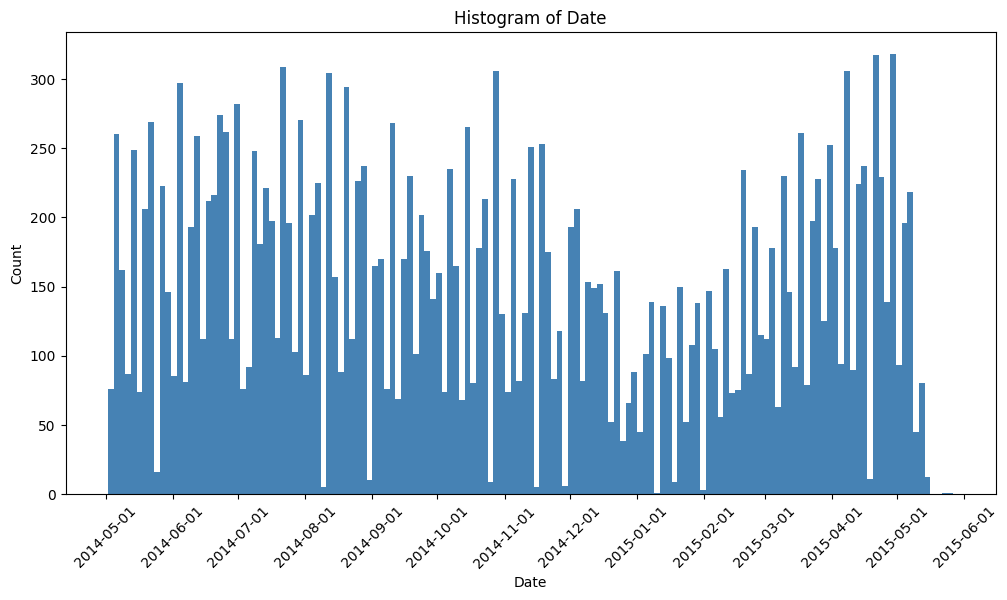

In [51]:
# Plotting a histogram to look at the spread of the data.

fig, ax = plt.subplots(figsize=(12, 6))  # Increase figure width
ax.hist(df['date'], bins=147, color = 'steelblue', edgecolor='none')
ax.set_title ('Histogram of Date')
ax.set_xlabel('Date')
ax.set_ylabel('Count')

ax.xaxis.set_major_formatter(mdates.DateFormatter('%Y-%m-%d'))
ax.xaxis.set_major_locator(mdates.MonthLocator(interval=1))
plt.xticks(rotation=45)

plt.show()

I used ChatGPT to help me reformat the histogram. Originally, the figure was too small to draw any conclusions. Therefore, I entered my original code (plt.hist()), and ChatGPT helped me to set the values as dates, replot the data using Axes, rather than pyplot, expand the x-axis, and increase the number of intervals to visualize the fluctuations over time (Chatgpt, n.d.).

<u>Price</u>

In [52]:
print("mean price = $", df['price'].mean().round(2))
print("median price = $", df['price'].median())
print("mode price = $", df['price'].mode())

mean price = $ 540088.14
median price = $ 450000.0
mode price = $ 0    350000.0
1    450000.0
Name: price, dtype: float64


The previous result suggests that there are two modes: `$350,000.00` and `$450,000.00`, so I want to count the number of rows with those prices to verify the output.

In [53]:
df.loc[df['price'] == 350000,'price']

154      350000.0
443      350000.0
724      350000.0
831      350000.0
939      350000.0
           ...   
20908    350000.0
20990    350000.0
21393    350000.0
21398    350000.0
21594    350000.0
Name: price, Length: 172, dtype: float64

In [54]:
df.loc[df['price'] == 450000,'price']

48       450000.0
276      450000.0
376      450000.0
406      450000.0
773      450000.0
           ...   
21020    450000.0
21122    450000.0
21152    450000.0
21198    450000.0
21456    450000.0
Name: price, Length: 172, dtype: float64

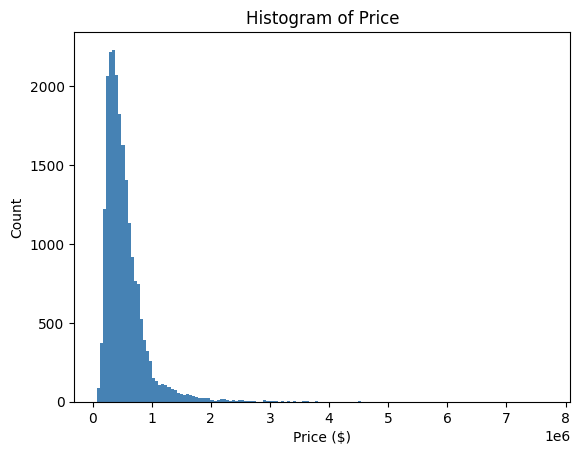

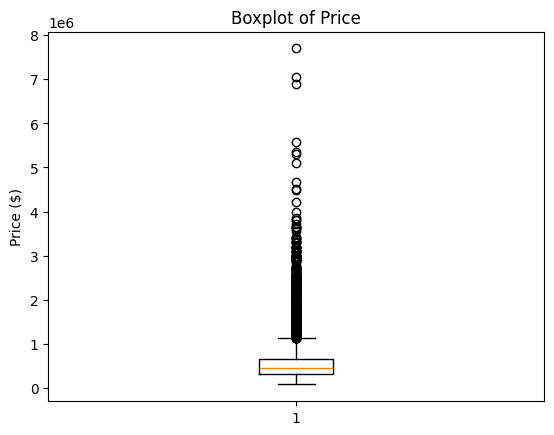

In [55]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['price'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Price')
plt.xlabel('Price ($)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['price'])
plt.title ('Boxplot of Price')
plt.ylabel('Price ($)')
plt.show()

When comparing the mean and median prices, the mean value is greater than the median, which is suggestive of a right, or positive skew. That skew was confirmed in the histogram and boxplot figures. There were a collection of high values data points greater than the mean. In summary, the histogram and boxplot demonstrate that the middle 50% of data points sit within the range of `$0` to `$1 million`, with several high value outliers.

<u>Bedrooms</u>  
The number of bedrooms is not a continuous dataset, therefore, it does not make sense to calculate the mean.

In [56]:
print("median bedrooms =", df['bedrooms'].median())
print("mode bedrooms =", df['bedrooms'].mode())
print("max number of bedrooms =", df['bedrooms'].max())
print("min number of bedrooms =", df['bedrooms'].min())

median bedrooms = 3.0
mode bedrooms = 0    3.0
Name: bedrooms, dtype: float64
max number of bedrooms = 10.0
min number of bedrooms = 1.0


The range of number of bedrooms is 0 to 10, therefore 11 bins are used in the histogram, rather than 147. Additional bins would not be more informative.  
Similar to the date column, a boxplot was not created for the number of bedrooms or any other categorical datasets. Boxplots are more appropriate for visualizing continuous numeric data.

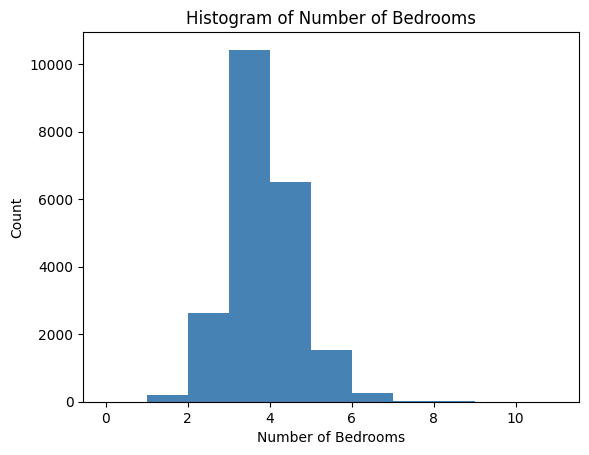

In [57]:
# Plotting a histogram to look at the spread of the data.

fig = plt.figure()
plt.hist(df['bedrooms'], bins=11, range = (0, 11), color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Number of Bedrooms')
plt.xlabel('Number of Bedrooms')
plt.ylabel('Count')
plt.show()

<u>Bathrooms</u>  
The number of bathrooms is not a continuous dataset, therefore, it does not make sense to calculate the mean.

In [58]:
print("median bathrooms =", df['bathrooms'].median())
print("mode bathrooms =", df['bathrooms'].mode())
print("max number of bathrooms =", df['bathrooms'].max())
print("min number of bathrooms =", df['bathrooms'].min())

median bathrooms = 2.25
mode bathrooms = 0    2.5
Name: bathrooms, dtype: float64
max number of bathrooms = 8.0
min number of bathrooms = 0.0


The range of number of bathrooms is 0 to 8, therefore 9 bins are used in the histogram, rather than 147. Additional bins would not be more informative.

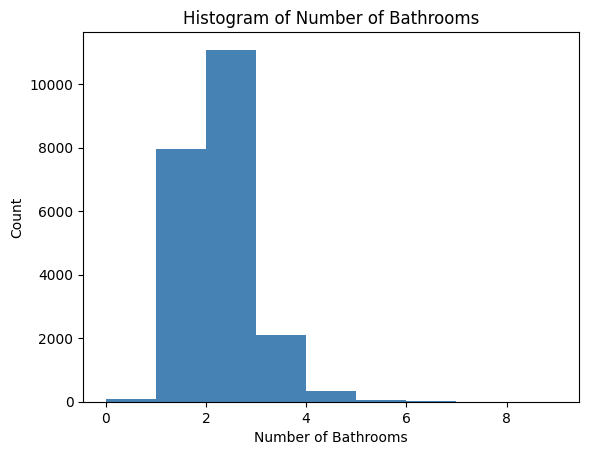

In [59]:
# Plotting a histogram to look at the spread of the data.

fig = plt.figure()
plt.hist(df['bathrooms'], bins=9, range = (0, 9), color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Number of Bathrooms')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Count')
plt.show()

<u>Area of the Living Space</u>

In [60]:
print("mean living sqft =", df['sqft_living'].mean().round(2), "ft\u00b2")
print("median living sqft =", df['sqft_living'].median(), "ft\u00b2")
print("mode living sqft =", df['sqft_living'].mode(), "ft\u00b2")

mean living sqft = 2079.9 ft²
median living sqft = 1910.0 ft²
mode living sqft = 0    1300.0
Name: sqft_living, dtype: float64 ft²


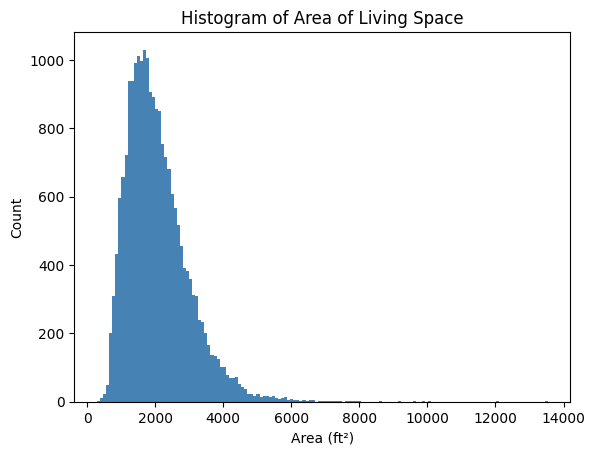

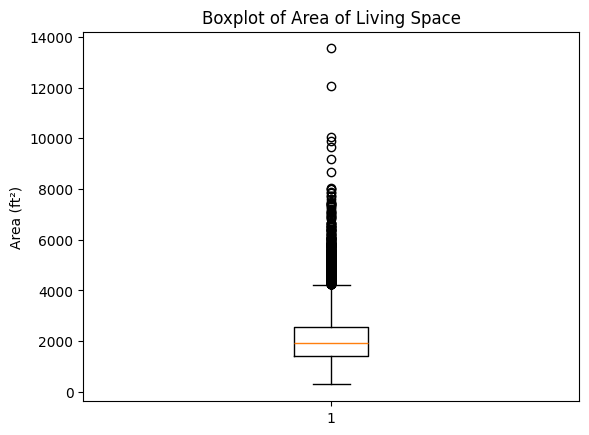

In [61]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_living'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Area of Living Space')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_living'])
plt.title ('Boxplot of Area of Living Space')
plt.ylabel('Area (ft\u00b2)')
plt.show()

<u>Lot Area</u>

In [62]:
print("mean lot sqft =", df['sqft_lot'].mean().round(2), "ft\u00b2")
print("median lot sqft =", df['sqft_lot'].median(), "ft\u00b2")
print("mode lot sqft =", df['sqft_lot'].mode(), "ft\u00b2")

mean lot sqft = 14994.96 ft²
median lot sqft = 7616.0 ft²
mode lot sqft = 0    5000.0
Name: sqft_lot, dtype: float64 ft²


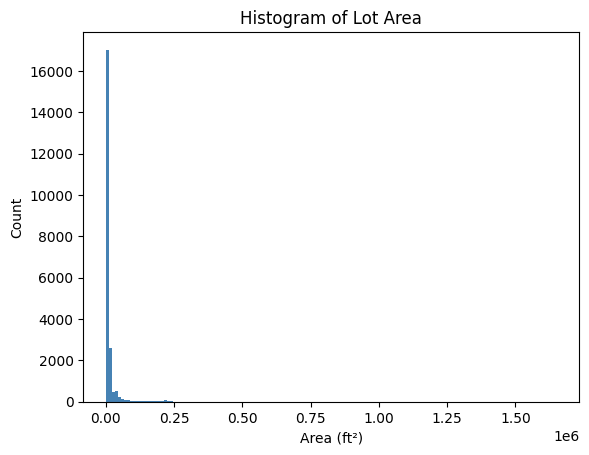

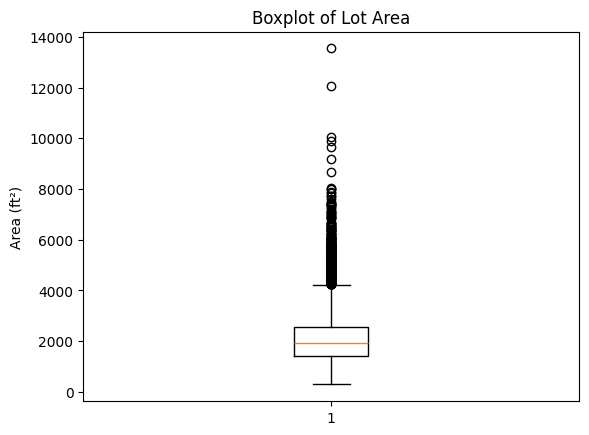

In [63]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_lot'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Lot Area')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_living'])
plt.title ('Boxplot of Lot Area')
plt.ylabel('Area (ft\u00b2)')
plt.show()

<u>Number of Floors</u>  
The number of floors is not a continuous dataset, therefore, it does not make sense to calculate the mean.

In [64]:
print("median floors =", df['floors'].median())
print("mode floors =", df['floors'].mode())
print("max number of floors =", df['floors'].max())
print("min number of floors =", df['floors'].min())

median floors = 1.5
mode floors = 0    1.0
Name: floors, dtype: float64
max number of floors = 3.5
min number of floors = 1.0


The range of number of bathrooms is 1 to 3.5, therefore 6 bins with 0.5-intervals are used in the histogram, rather than 147. Additional bins would not be more informative.

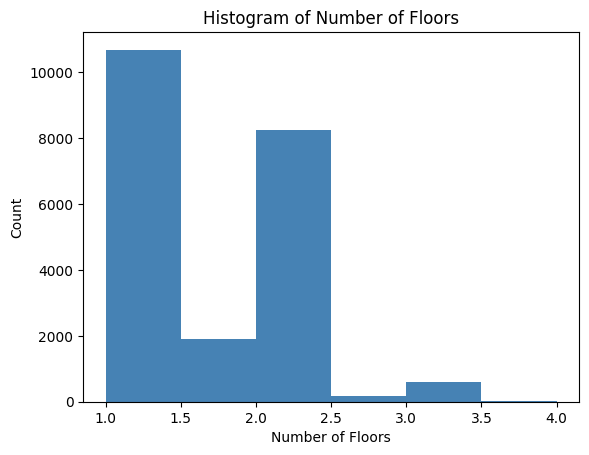

In [65]:
# Plotting a histogram to look at the spread of the data.

fig = plt.figure()
plt.hist(df['floors'], bins = 6, range = (1, 4), color = 'steelblue', edgecolor = 'none')
plt.title ('Histogram of Number of Floors')
plt.xlabel('Number of Floors')
plt.ylabel('Count')
plt.show()

<u>Waterfront View</u>   
Although the waterfront view dataset is a binary, presence (=1) or absence (=0), the mean can illuminate an intermediate measure of centrality between 0 and 1.

In [66]:
print("mean waterfront =", round(df['waterfront'].mean(), 2))
print("median waterfront =", df['waterfront'].median())
print("mode waterfront =", df['waterfront'].mode())

mean waterfront = 0.01
median waterfront = 0.0
mode waterfront = 0    0
Name: waterfront, dtype: int64


The presence or absence of a waterfront view is a binary dataset. Therefore, a bar chart was used to visualize the data.

[0 1]
waterfront
0    21450
1      163
Name: count, dtype: int64


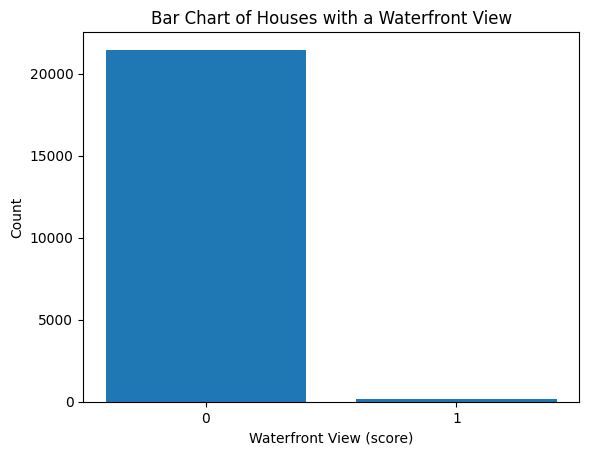

In [67]:
# Plotting a bar chart to look at the frequency of houses with a waterfront view.

waterfront = np.sort(df['waterfront'].unique())
print(waterfront)

waterfront_count = df['waterfront'].value_counts().sort_index()
print(waterfront_count)

waterfront_string = waterfront.astype(str)

plt.figure()
plt.bar(waterfront_string, waterfront_count.values)
plt.xlabel("Waterfront View (score)")
plt.ylabel("Count")
plt.title("Bar Chart of Houses with a Waterfront View")
plt.show()

I used a simple bar chart to visualize the data, rather than a histogram. I defined the x axis as the unique values, which I identified through the sort and unique functions that returned values of 0 and 1. Then, the value-count function counted the occurrences of each unique value and the sort-index function ordered the binary values on the x-axis. The astype function was used to convert the numerical indexed values of 0 and 1 to strings. This process allowed me to graph the frequency of the zeroes and ones in a bar chart. This process was replicated for the later bar charts.

<u>View</u>  
Although the view dataset is a binary, presence (=1) or absence (=0), the mean can illuminate an intermediate measure of centrality between 0 and 1.

In [68]:
print("mean view =", df['view'].mean())
print("median view =", df['view'].median())
print("mode view =", df['view'].mode())
print("max score of view =", df['view'].max())
print("min score of view =", df['view'].min())

mean view = 0.09827418683199926
median view = 0.0
mode view = 0    0
Name: view, dtype: int64
max score of view = 1
min score of view = 0


The presence or absence of a view is a binary dataset. Therefore, a bar chart was used to visualize the data.

[0 1]
view
0    19489
1     2124
Name: count, dtype: int64


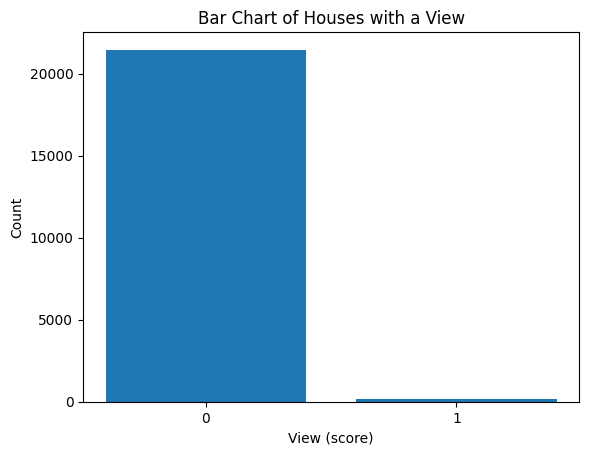

In [69]:
# Plotting a bar chart to look at the frequency of houses with a view.

view = np.sort(df['view'].unique())
print(view)

view_count = df['view'].value_counts().sort_index()
print(view_count)

view_string = view.astype(str)

plt.figure()
plt.bar(waterfront_string, waterfront_count.values)
plt.xlabel("View (score)")
plt.ylabel("Count")
plt.title("Bar Chart of Houses with a View")
plt.show()

<u>Condition</u>  
The score of the condition is not a continuous dataset, therefore, it does not make sense to calculate the mean.

In [70]:
print("median condition =", df['condition'].median())
print("mode condition =", df['condition'].mode())
print("max score of condition =", df['condition'].max())
print("min score of condition =", df['condition'].min())

median condition = 3.0
mode condition = 0    3
Name: condition, dtype: int64
max score of condition = 5
min score of condition = 1


The range of condition scores is 1 to 5, therefore 5 bins are used in the histogram, rather than 147. Additional bins would not be more informative.

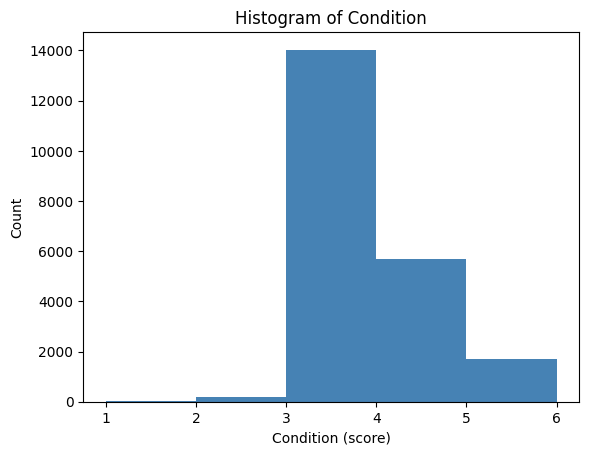

In [71]:
# Plotting a histogram to look at the spread of the data.

fig = plt.figure()
plt.hist(df['condition'], bins = 5, range = (1, 6), color = 'steelblue', edgecolor = 'none')
plt.title ('Histogram of Condition')
plt.xlabel('Condition (score)')
plt.ylabel('Count')
plt.show()

<u>Grade</u>  
The grade is not a continuous dataset, therefore, it does not make sense to calculate the mean.

In [72]:
print("median grade =", df['grade'].median())
print("mode grade =", df['grade'].mode())
print("max score of grade =", df['grade'].max())
print("min score of grade =", df['grade'].min())

median grade = 7.0
mode grade = 0    7
Name: grade, dtype: int64
max score of grade = 13
min score of grade = 1


The range of grades is 1 to 13, therefore 13 bins are used in the histogram, rather than 147. Additional bins would not be more informative.

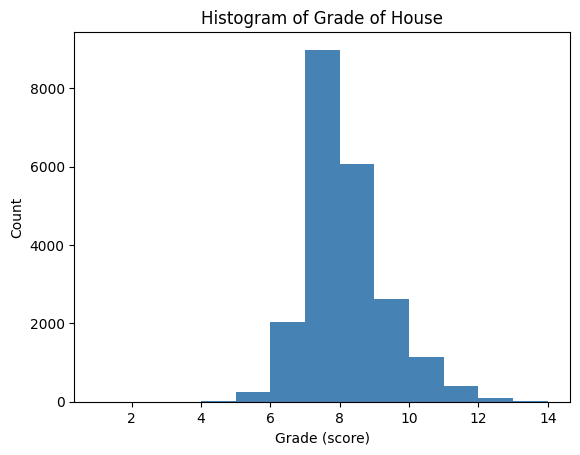

In [73]:
# Plotting a histogram to look at the spread of the data.

fig = plt.figure()
plt.hist(df['grade'], bins = 13, range = (1, 14), color = 'steelblue', edgecolor = 'none')
plt.title ('Histogram of Grade of House')
plt.xlabel('Grade (score)')
plt.ylabel('Count')
plt.show()

<u>Area Above Ground</u>

In [74]:
print("mean sqft above =", df['sqft_above'].mean().round(1), "ft\u00b2")
print("median sqft above =", df['sqft_above'].median(), "ft\u00b2")
print("mode sqft above =", df['sqft_above'].mode(), "ft\u00b2")

mean sqft above = 1788.4 ft²
median sqft above = 1560.0 ft²
mode sqft above = 0    1300
Name: sqft_above, dtype: int64 ft²


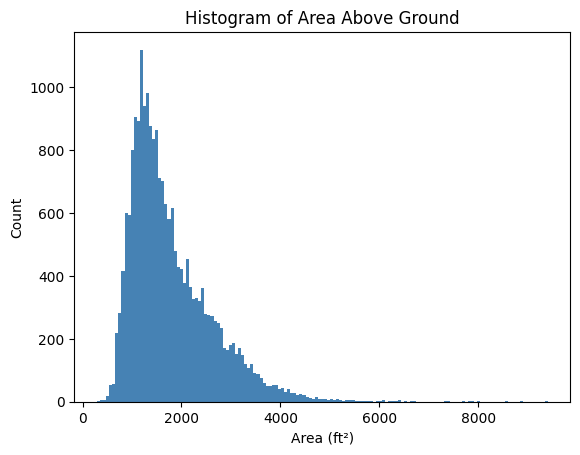

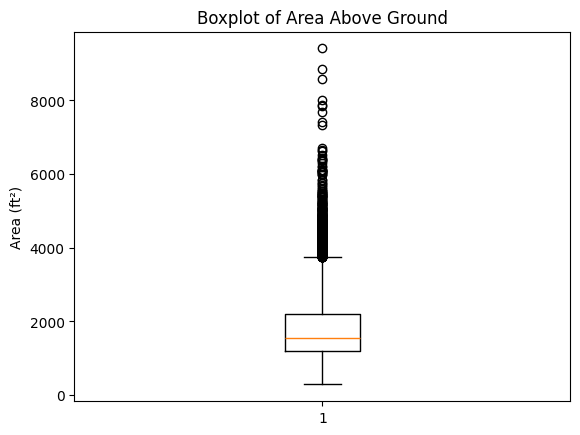

In [75]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_above'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Area Above Ground')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_above'])
plt.title ('Boxplot of Area Above Ground')
plt.ylabel('Area (ft\u00b2)')
plt.show()

<u>Basement Area</u>

In [76]:
print("mean basement sqft =", df['sqft_basement'].mean().round(1))
print("median basement sqft =", df['sqft_basement'].median())
print("mode basement sqft =", df['sqft_basement'].mode())

mean basement sqft = 291.5
median basement sqft = 0.0
mode basement sqft = 0    0
Name: sqft_basement, dtype: int64


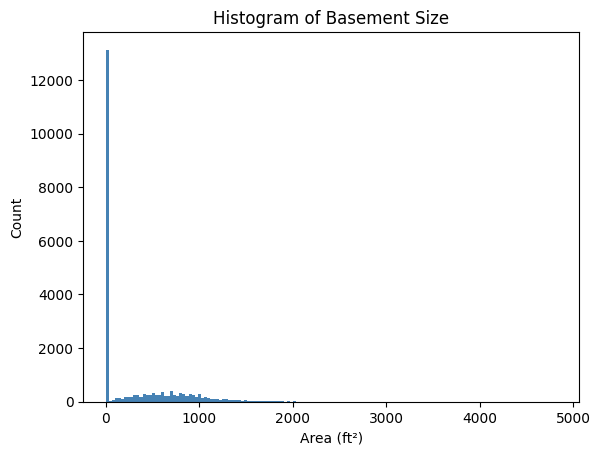

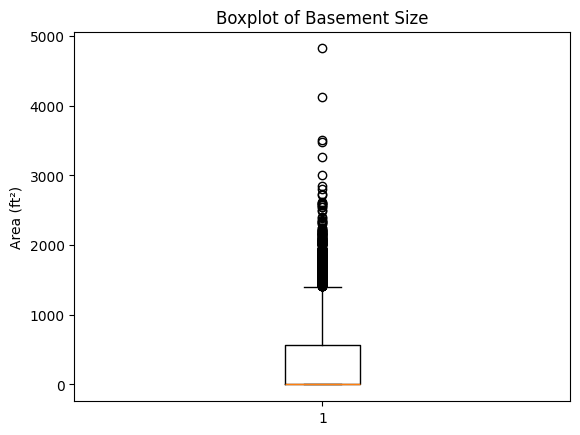

In [77]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_basement'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Basement Size')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_basement'])
plt.title ('Boxplot of Basement Size')
plt.ylabel('Area (ft\u00b2)')
plt.show()

<u>Year Built</u>  
Dates are not technically a continuous dataset, therefore, it does not make sense to calculate the mean.

In [78]:
print("median view =", df['yr_built'].median())
print("mode view =", df['yr_built'].mode())
print("max score of view =", df['yr_built'].max())
print("min score of view =", df['yr_built'].min())
print("range of score of view =", df['yr_built'].max()-df['yr_built'].min())

median view = 1975.0
mode view = 0    2014
Name: yr_built, dtype: int64
max score of view = 2015
min score of view = 1900
range of score of view = 115


[1900 1901 1902 1903 1904 1905 1906 1907 1908 1909 1910 1911 1912 1913
 1914 1915 1916 1917 1918 1919 1920 1921 1922 1923 1924 1925 1926 1927
 1928 1929 1930 1931 1932 1933 1934 1935 1936 1937 1938 1939 1940 1941
 1942 1943 1944 1945 1946 1947 1948 1949 1950 1951 1952 1953 1954 1955
 1956 1957 1958 1959 1960 1961 1962 1963 1964 1965 1966 1967 1968 1969
 1970 1971 1972 1973 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983
 1984 1985 1986 1987 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997
 1998 1999 2000 2001 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011
 2012 2013 2014 2015]
yr_built
1900     87
1901     29
1902     27
1903     46
1904     45
       ... 
2011    130
2012    170
2013    201
2014    559
2015     38
Name: count, Length: 116, dtype: int64


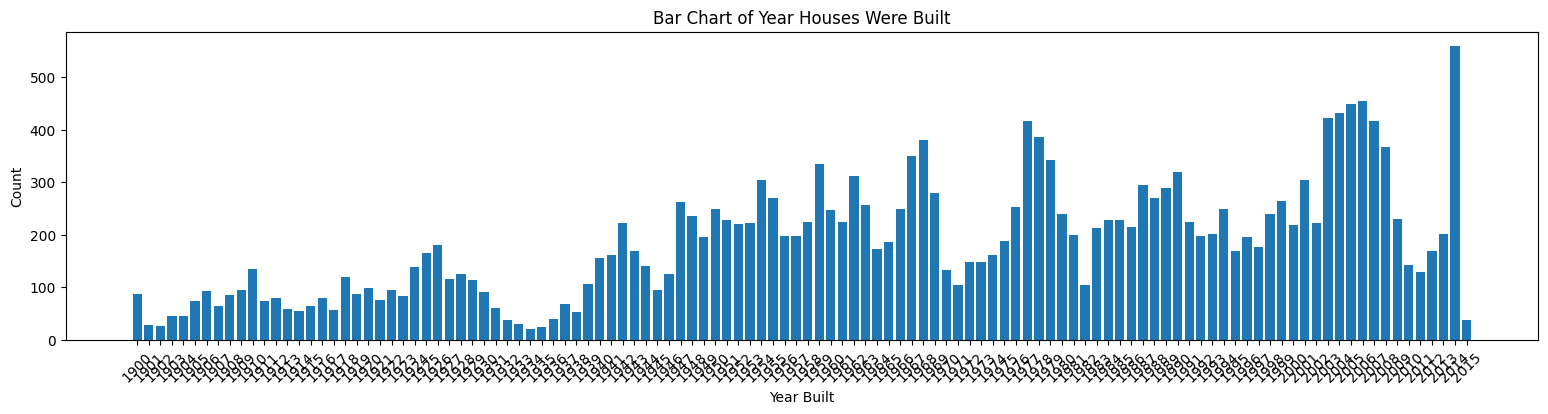

In [79]:
# Plotting a bar chart to look at the frequency of houses built each year.

yr_built = np.sort(df['yr_built'].unique())
print(yr_built)

yr_built_count = df['yr_built'].value_counts().sort_index()
print(yr_built_count)

yr_built_string = yr_built.astype(str)

plt.figure(figsize=(19, 4))
plt.bar(yr_built_string, yr_built_count.values)
plt.xlabel("Year Built")
plt.ylabel("Count")
plt.title("Bar Chart of Year Houses Were Built")
plt.xticks(rotation=45)
plt.show()

<u>Year Renovated</u>  
Dates are not technically a continuous dataset, therefore, it does not make sense to calculate the mean.

In [80]:
print("median year renovated =", df['yr_renovated'].median())
print("mode year renovated = ", df['yr_renovated'].mode())

median year renovated = 0.0
mode year renovated =  0    0
Name: yr_renovated, dtype: int64


In [81]:
# Creating a list of years that the houses were renovated.

reno_yr = np.sort(df['yr_renovated'].unique())
print(reno_yr)

reno_yr_count = df['yr_renovated'].value_counts().sort_index()
print(reno_yr_count)

[   0 1934 1940 1944 1945 1946 1948 1950 1951 1953 1954 1955 1956 1957
 1958 1959 1960 1962 1963 1964 1965 1967 1968 1969 1970 1971 1972 1973
 1974 1975 1976 1977 1978 1979 1980 1981 1982 1983 1984 1985 1986 1987
 1988 1989 1990 1991 1992 1993 1994 1995 1996 1997 1998 1999 2000 2001
 2002 2003 2004 2005 2006 2007 2008 2009 2010 2011 2012 2013 2014 2015]
yr_renovated
0       20699
1934        1
1940        2
1944        1
1945        3
        ...  
2011       13
2012       11
2013       37
2014       91
2015       16
Name: count, Length: 70, dtype: int64


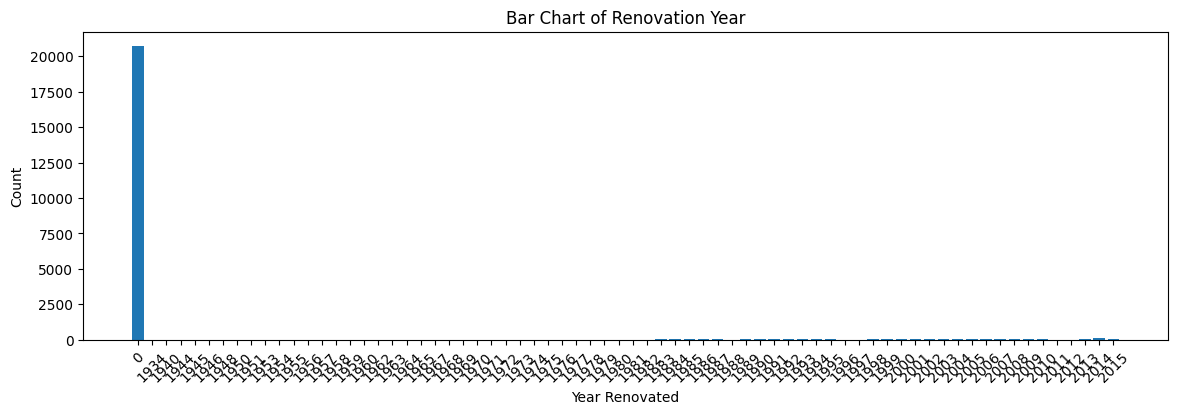

In [82]:
# Plotting a bar chart to look at the frequency of houses renovated.

reno_yr_string = reno_yr.astype(str)

plt.figure(figsize=(14,4))
plt.bar(reno_yr_string, reno_yr_count.values)
plt.xlabel("Year Renovated")
plt.ylabel("Count")
plt.title("Bar Chart of Renovation Year")
plt.xticks(rotation = 45)
plt.show()

<u>Zipcode</u>  
Zipcodes are not a continuous dataset, therefore, it does not make sense to calculate the mean.

In [83]:
print("zipcode median =", df['zipcode'].median())
print("zipcode mode = ", df['zipcode'].mode())

zipcode median = 98065.0
zipcode mode =  0    98103
Name: zipcode, dtype: int64


[98001 98002 98003 98004 98005 98006 98007 98008 98010 98011 98014 98019
 98022 98023 98024 98027 98028 98029 98030 98031 98032 98033 98034 98038
 98039 98040 98042 98045 98052 98053 98055 98056 98058 98059 98065 98070
 98072 98074 98075 98077 98092 98102 98103 98105 98106 98107 98108 98109
 98112 98115 98116 98117 98118 98119 98122 98125 98126 98133 98136 98144
 98146 98148 98155 98166 98168 98177 98178 98188 98198 98199]
zipcode
98001    362
98002    199
98003    280
98004    317
98005    168
        ... 
98177    255
98178    262
98188    136
98198    280
98199    317
Name: count, Length: 70, dtype: int64


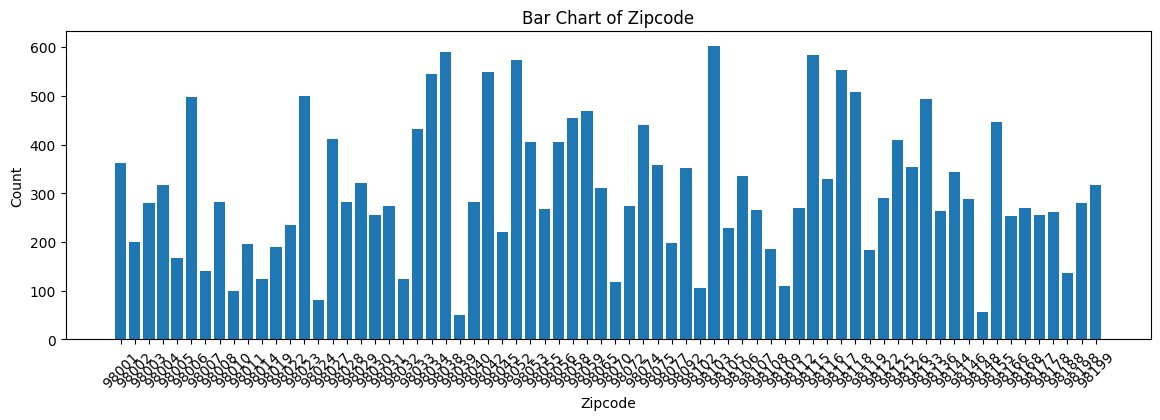

In [84]:
# Plotting a bar chart to visualize the data.

zipcode = np.sort(df['zipcode'].unique())
print(zipcode)

zipcode_count = df['zipcode'].value_counts().sort_index()
print(zipcode_count)

zipcode_string = zipcode.astype(str)

plt.figure(figsize=(14,4))
plt.bar(zipcode_string, zipcode_count.values)
plt.xlabel("Zipcode")
plt.ylabel("Count")
plt.title("Bar Chart of Zipcode")
plt.xticks(rotation = 45)
plt.show()

<u>Latitude</u>

In [85]:
print("mean latitude =", df['lat'].mean().round(1))
print("median latitude =", df['lat'].median())
print("mode latitude =", df['lat'].mode())

mean latitude = 47.6
median latitude = 47.5718
mode latitude = 0    47.5322
1    47.5491
2    47.6624
3    47.6846
Name: lat, dtype: float64


The previous result suggests that there are four modes: 47.5322, 47.5491, 47.6624, and 47.6846, so I want to count the number of rows with those prices to verify the output.

In [86]:
lat_mode_1 = df['lat'] == 47.5322
print("lat_mode_1 =", lat_mode_1.sum())

lat_mode_2 = df['lat'] == 47.5491
print("lat_mode_2 =", lat_mode_2.sum())

lat_mode_3 = df['lat'] == 47.6624
print("lat_mode_3 =", lat_mode_3.sum())

lat_mode_4 = df['lat'] == 47.6846
print("lat_mode_4 =", lat_mode_4.sum())

lat_mode_1 = 17
lat_mode_2 = 17
lat_mode_3 = 17
lat_mode_4 = 17


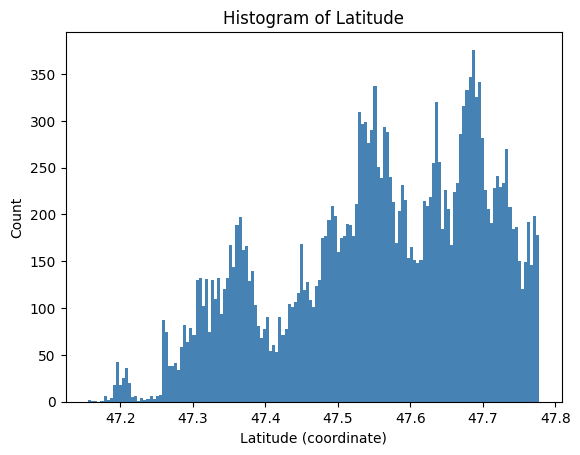

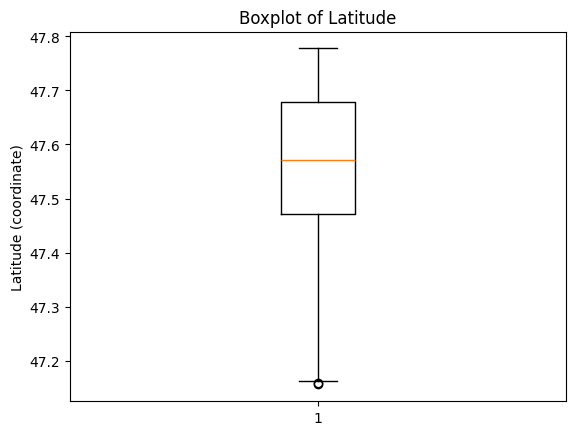

In [87]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['lat'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Latitude')
plt.xlabel('Latitude (coordinate)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['lat'])
plt.title ('Boxplot of Latitude')
plt.ylabel('Latitude (coordinate)')
plt.show()

<u>Longitude</u>

In [88]:
print("mean longitude =", df['long'].mean().round(1))
print("median longitude =", df['long'].median())
print("mode longitude =", df['long'].mode())

mean longitude = -122.2
median longitude = -122.23
mode longitude = 0   -122.29
Name: long, dtype: float64


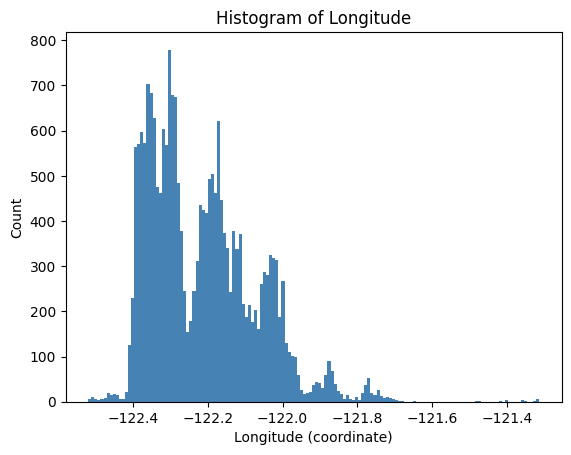

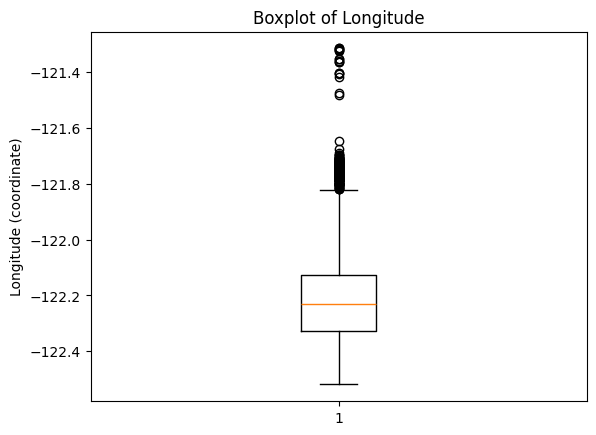

In [89]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['long'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Longitude')
plt.xlabel('Longitude (coordinate)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['long'])
plt.title ('Boxplot of Longitude')
plt.ylabel('Longitude (coordinate)')
plt.show()

<u>Average Area of the Living Space of 15 Nearby Houses</u>

In [90]:
print("mean sqft_living15 =", df['sqft_living15'].mean().round(1), "ft\u00b2")
print("median sqft_living15 =", df['sqft_living15'].median(), "ft\u00b2")
print("mode sqft_living15 =", df['sqft_living15'].mode(), "ft\u00b2")

mean sqft_living15 = 1986.6 ft²
median sqft_living15 = 1840.0 ft²
mode sqft_living15 = 0    1540
Name: sqft_living15, dtype: int64 ft²


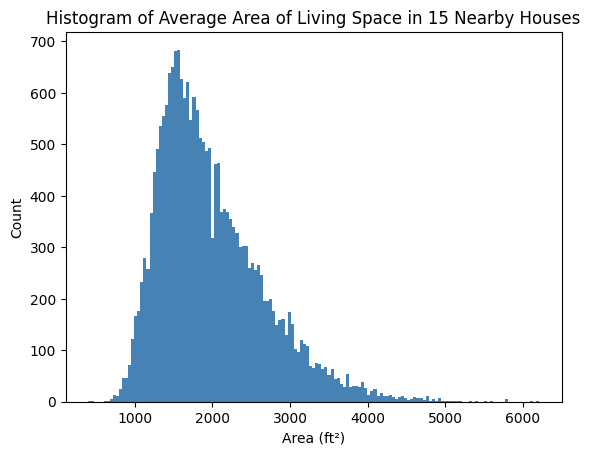

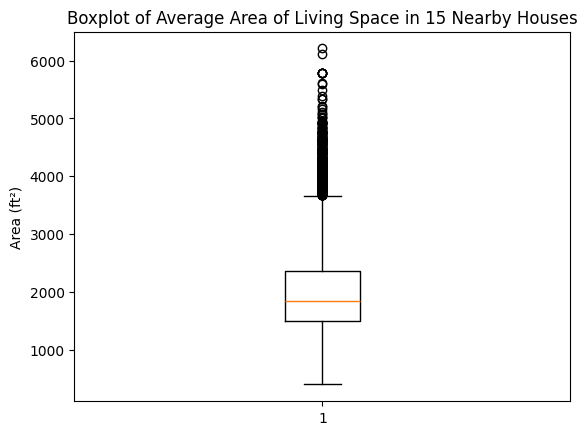

In [91]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_living15'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Average Area of Living Space in 15 Nearby Houses')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_living15'])
plt.title ('Boxplot of Average Area of Living Space in 15 Nearby Houses')
plt.ylabel('Area (ft\u00b2)')
plt.show()

<u>Average Lot Area of 15 Nearby Houses</u>

In [92]:
print("mean sqft_lot15 =", df['sqft_lot15'].mean().round(1), "ft\u00b2")
print("median sqft_lot15 =", df['sqft_lot15'].median(), "ft\u00b2")
print("mode sqft_lot15 =", df['sqft_lot15'].mode(), "ft\u00b2")

mean sqft_lot15 = 12768.5 ft²
median sqft_lot15 = 7620.0 ft²
mode sqft_lot15 = 0    5000
Name: sqft_lot15, dtype: int64 ft²


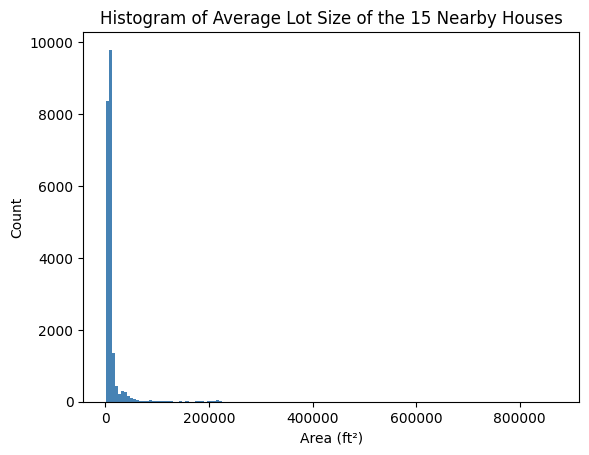

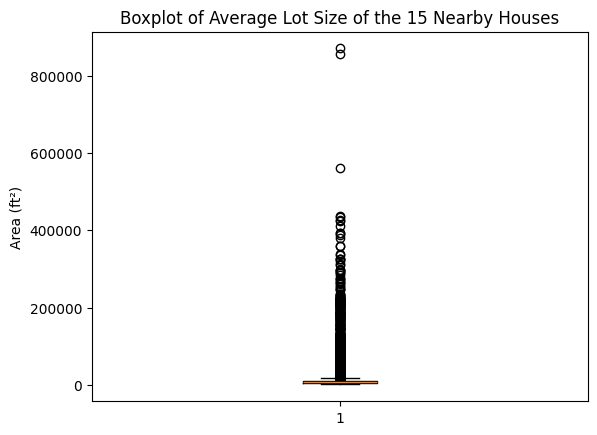

In [93]:
# Plotting a histogram and boxplot to look at the spread of the data.

fig = plt.figure()
plt.hist(df['sqft_lot15'], bins=147, color = 'steelblue', edgecolor='none')
plt.title ('Histogram of Average Lot Size of the 15 Nearby Houses')
plt.xlabel('Area (ft\u00b2)')
plt.ylabel('Count')
plt.show()

fig = plt.figure()
plt.boxplot(df['sqft_lot15'])
plt.title ('Boxplot of Average Lot Size of the 15 Nearby Houses')
plt.ylabel('Area (ft\u00b2)')
plt.show()

## 2.3 Diagnose for correlations between variables and determine independent and dependent variables.

In [94]:
pd.set_option('display.max_columns', None)

corr_matrix = df.corr()
corr_matrix

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,condition,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
id,1.000000,0.005577,-0.016762,0.006046,0.002101,-0.012258,-0.132169,0.018525,-0.002721,0.011405,-0.023783,0.008130,-0.010842,-0.005151,0.021380,-0.016907,-0.008224,-0.001891,0.020799,-0.002901,-0.138798
date,0.005577,1.000000,-0.004357,-0.013258,-0.033640,-0.034559,0.005814,-0.022491,0.001356,0.000911,-0.050769,-0.039912,-0.027924,-0.019469,-0.000355,-0.024509,0.001404,-0.032856,-0.007020,-0.031515,0.002566
price,-0.016762,-0.004357,1.000000,0.310415,0.515365,0.702035,0.088409,0.256794,0.266369,0.359120,0.036362,0.667434,0.605567,0.323816,0.054012,0.126434,-0.053203,0.307003,0.021626,0.585379,0.082447
bedrooms,0.006046,-0.013258,0.310415,1.000000,0.500288,0.577253,0.028340,0.180108,-0.005206,0.083063,0.024034,0.358786,0.480942,0.298049,0.156788,0.019798,-0.155081,-0.011440,0.132257,0.394101,0.026261
bathrooms,0.002101,-0.033640,0.515365,0.500288,1.000000,0.735542,0.084776,0.487859,0.067113,0.170830,-0.123002,0.648745,0.667757,0.276989,0.495315,0.048536,-0.200677,0.026612,0.218557,0.554516,0.086509
sqft_living,-0.012258,-0.034559,0.702035,0.577253,0.735542,1.000000,0.170123,0.353949,0.103818,0.270907,-0.058753,0.762704,0.876597,0.435043,0.318049,0.055363,-0.199430,0.052529,0.240223,0.756420,0.183286
sqft_lot,-0.132169,0.005814,0.088409,0.028340,0.084776,0.170123,1.000000,-0.006541,0.021987,0.068182,-0.007833,0.110997,0.180713,0.014914,0.052252,0.008106,-0.130286,-0.086778,0.228310,0.146277,0.733069
floors,0.018525,-0.022491,0.256794,0.180108,0.487859,0.353949,-0.006541,1.000000,0.023698,0.017871,-0.263768,0.458183,0.523885,-0.245705,0.489319,0.006338,-0.059121,0.049614,0.125419,0.279885,-0.011269
waterfront,-0.002721,0.001356,0.266369,-0.005206,0.067113,0.103818,0.021987,0.023698,1.000000,0.264057,0.016653,0.082775,0.072075,0.080588,-0.026161,0.092885,0.030285,-0.014274,-0.041910,0.086463,0.030703
view,0.011405,0.000911,0.359120,0.083063,0.170830,0.270907,0.068182,0.017871,0.264057,1.000000,0.047143,0.237327,0.153325,0.275310,-0.062810,0.095029,0.091213,0.009529,-0.088244,0.273444,0.064345


The corr function laid out this correlation table, but it is not properly formatted. The data should be in a triangle that results from excluding the duplicate values. Therefore, I turned to ChatGPT to help me refine the table.

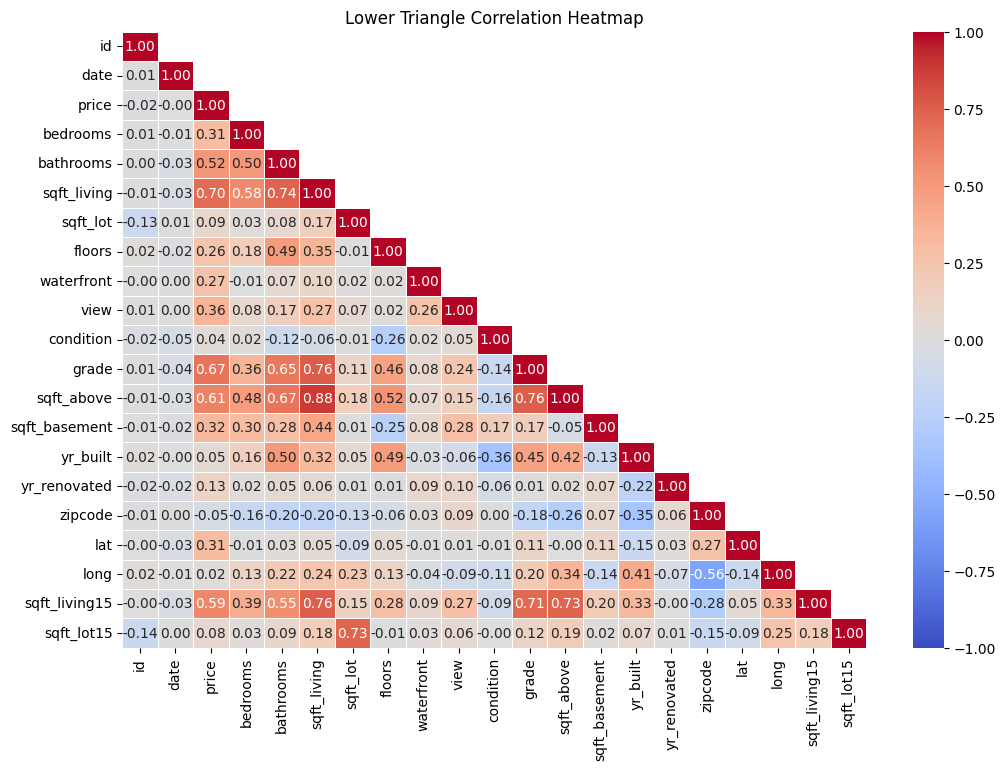

In [95]:
# Create upper triangle mask
mask = np.triu(np.ones_like(corr_matrix, dtype=bool), k=1)

# Plot heatmap with masked lower triangle
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix, 
    mask=mask,          # mask the lower triangle
    annot=True,          # show values
    fmt=".2f",           # number format
    cmap="coolwarm", 
    vmin=-1, vmax=1, 
    linewidths=0.5
)

plt.title("Lower Triangle Correlation Heatmap")
plt.show()

I used ChatGPT to help me figure out how to print the correlation table and color the cells using a heatmap to identify strong correlations (Chatgpt, n.d.).

The correlation table above contains variables that exhibit weak correlations.  
I will filter out variables with weak correlation values (< |0.5|) and the self-correlation values (=1).  
I will return the variables with moderate to strong correlation values (>= |0.50|).

In [96]:
high_corr = ((corr_matrix.abs() > 0.49) & (corr_matrix.abs() < 1))
high_corr.columns[high_corr.any()]

Index(['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors',
       'grade', 'sqft_above', 'yr_built', 'zipcode', 'long', 'sqft_living15',
       'sqft_lot15'],
      dtype='object')

A reduced correlation matrix will be used to visualize the moderate to strong correlations only.

In [97]:
corr_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'long', 'sqft_living15', 'sqft_lot15']

corr_matrix_red = df[corr_col].corr()
corr_matrix_red

,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,grade,sqft_above,yr_built,zipcode,long,sqft_living15,sqft_lot15
price,1.000000,0.310415,0.515365,0.702035,0.088409,0.256794,0.667434,0.605567,0.054012,-0.053203,0.021626,0.585379,0.082447
bedrooms,0.310415,1.000000,0.500288,0.577253,0.028340,0.180108,0.358786,0.480942,0.156788,-0.155081,0.132257,0.394101,0.026261
bathrooms,0.515365,0.500288,1.000000,0.735542,0.084776,0.487859,0.648745,0.667757,0.495315,-0.200677,0.218557,0.554516,0.086509
sqft_living,0.702035,0.577253,0.735542,1.000000,0.170123,0.353949,0.762704,0.876597,0.318049,-0.199430,0.240223,0.756420,0.183286
sqft_lot,0.088409,0.028340,0.084776,0.170123,1.000000,-0.006541,0.110997,0.180713,0.052252,-0.130286,0.228310,0.146277,0.733069
floors,0.256794,0.180108,0.487859,0.353949,-0.006541,1.000000,0.458183,0.523885,0.489319,-0.059121,0.125419,0.279885,-0.011269
grade,0.667434,0.358786,0.648745,0.762704,0.110997,0.458183,1.000000,0.755923,0.446963,-0.184862,0.198372,0.713202,0.119248
sqft_above,0.605567,0.480942,0.667757,0.876597,0.180713,0.523885,0.755923,1.000000,0.423898,-0.261190,0.343803,0.731870,0.194050
yr_built,0.054012,0.156788,0.495315,0.318049,0.052252,0.489319,0.446963,0.423898,1.000000,-0.346869,0.409356,0.326229,0.070958
zipcode,-0.053203,-0.155081,-0.200677,-0.199430,-0.130286,-0.059121,-0.184862,-0.261190,-0.346869,1.000000,-0.564072,-0.279033,-0.147221


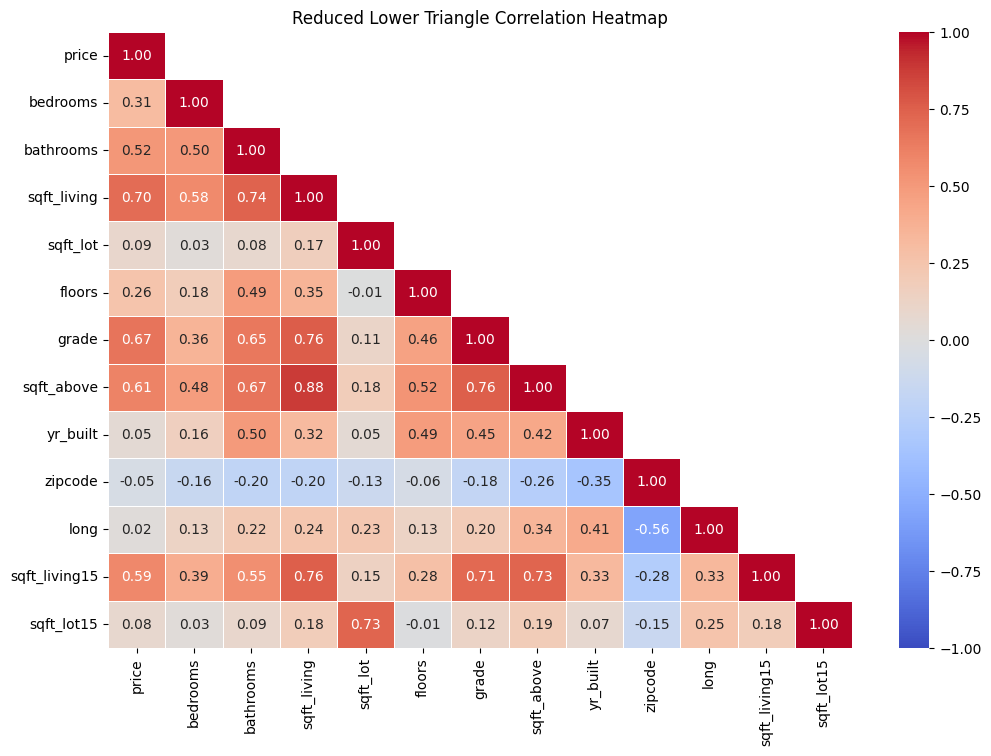

In [98]:
# Create upper triangle mask
mask1 = np.triu(np.ones_like(corr_matrix_red, dtype=bool), k=1)

# Plot heatmap with masked lower triangle
plt.figure(figsize=(12, 8))
sns.heatmap(
    corr_matrix_red, 
    mask=mask1,          # mask the lower triangle
    annot=True,          # show values
    fmt=".2f",           # number format
    cmap="coolwarm", 
    vmin=-1, vmax=1, 
    linewidths=0.5
)

plt.title("Reduced Lower Triangle Correlation Heatmap")
plt.show()

Of the 13 variables with moderate to strong correlation values, **price** appears to be a dependent variable with moderately positive correlations with independent variables such as living area (0.70), grade (0.67), area above (0.61), and the average living area of 15 nearby houses (0.59).

Price, as indicated by the accompanying text file, is the most obvious dependent variable. However, additional strong correlations were visualized below.

The **living area size** has strong correlations with the area above (0.88), grade (0.76), average living area of 15 nearby houses (0.76), and number of bathrooms (0.72).

The **area of the lot** has a strong positive correlation with the average lot areas of 15 nearby houses (0.73), a potential predictor.

The **average living area of 15 nearby houses** has strong positive correlations with the living area (0.76), area above ground (0.73), and grade of the house (0.71).

Although the price is the most obvious depdendent variable, all of these relationships will be explored.

## 2.4 Perform exploratory analysis in combination with visualization techniques to discover patterns and features of interest.

<u>Price vs. Area of Living Space (and Grade)</u>

slope = 280.62
intercept = -43580.74
correlation value = 0.7


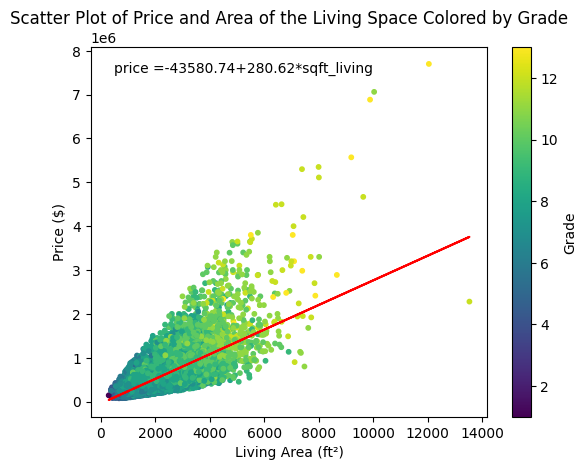

In [99]:
fig = plt.figure()
plt.scatter(df['sqft_living'], df['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_living'], df['price'], 1)
line = slope * df['sqft_living'] + intercept
plt.plot(df['sqft_living'], line, color = 'red')
plt.text(500, 7500000, ("price =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_living"))

print("slope =", str(round(slope, 2)))
print("intercept =", str(round(intercept, 2)))
price_living_corr = df['price'].corr(df['sqft_living'])
print("correlation value =", str(round(price_living_corr, 2)))

plt.title ('Scatter Plot of Price and Area of the Living Space Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

The Bobbitt (2020) webpage was used to help me find the code to create a scatter plot with a color scheme from a third column. In this case, I plotted living area on the x-axis and price on the y-axis while color-coding the data points by grade of the house. (Grade was selected for color coding because it is a categorical dataset.) The color coding itself was very useful, however, I still required a reference to the magnitudes described by the color. As such, I sought a color bar to provide a scale for the grade of each house. This is when I turned to GeeksforGeeks (2020). I used a single line of code in their example to build the color bar on the existing scatter plot. Lastly, I wanted to fit a trendline to the scatter plot data to visualize the relationship described in the correlation table. Therefore, I referenced the code written in GeeksforGeeks (2024) to create a best fit line.  
Overall, this figure shows a positive correlation of both living area and grade with price. These trends align with the values from the correlation table and the best fit line in red, which has a positive slope.

In [100]:
z_scaled = df.copy()

norm_col = ['price', 'bedrooms', 'bathrooms', 'sqft_living', 'sqft_lot', 'floors', 'grade', 'sqft_above', 'yr_built', 'zipcode', 'long', 'sqft_living15', 'sqft_lot15']

z_scaled[norm_col] = zscore(z_scaled[norm_col])
print(z_scaled)

               id       date     price  bedrooms  bathrooms  sqft_living  \
0      7129300520 2014-10-13 -0.866717 -0.399806  -1.493191    -0.979835   
1      6414100192 2014-12-09 -0.005688 -0.399806   0.172942     0.533634   
2      5631500400 2015-02-25 -0.980849 -1.531124  -1.493191    -1.426254   
3      2487200875 2014-12-09  0.174090  0.731512   1.172623    -0.130550   
4      1954400510 2015-02-18 -0.081958 -0.399806  -0.160284    -0.435422   
...           ...        ...       ...       ...        ...          ...   
21608   263000018 2014-05-21 -0.490545 -0.399806   0.506169    -0.598746   
21609  6600060120 2015-02-23 -0.381588  0.731512   0.506169     0.250539   
21610  1523300141 2014-06-23 -0.375865 -1.531124  -1.826418    -1.154047   
21611   291310100 2015-01-16 -0.381588 -0.399806   0.506169    -0.522528   
21612  1523300157 2014-10-15 -0.585882 -1.531124  -1.826418    -1.154047   

       sqft_lot    floors  waterfront  view  condition     grade  sqft_above  \
0     -

Normalizing the data opens the door to modeling. Therefore, I referenced the GeeksforGeeks (2021) webpage to standardize the graphed data by their respective z-scores. Normalizing allows for a proper comparison between two variables on a common scale, which is the deviation from the mean that is set at zero.

<u>Price vs. Area of Living Space (and Grade), Normalized</u>

best fit slope = 0.7
best fit intercept = -0.0
model slope = 0.7
model intercept = -0.0
model R² = 0.49
correlation value = 0.7


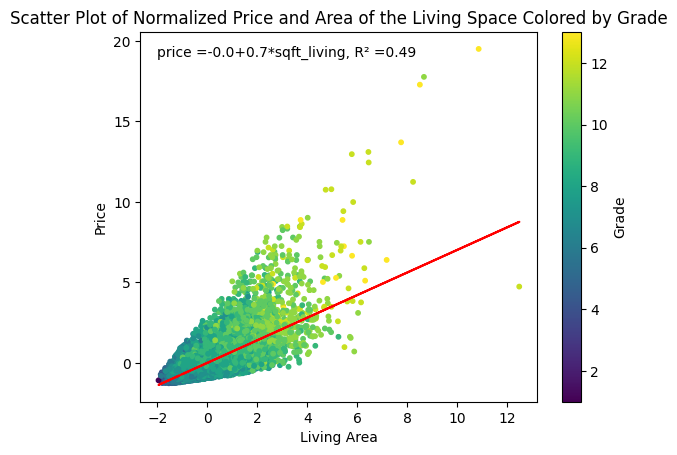

In [101]:
fig = plt.figure()
plt.scatter(z_scaled['sqft_living'], z_scaled['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_living'], z_scaled['price'], 1)
line = slope * z_scaled['sqft_living'] + intercept
plt.plot(z_scaled['sqft_living'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_living']], z_scaled['price'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_living']], z_scaled['price'])

plt.text(-2, 19, ("price =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_living" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
price_living_corr = df['price'].corr(df['sqft_living'])
print("correlation value =", str(round(price_living_corr, 2)))

plt.title ('Scatter Plot of Normalized Price and Area of the Living Space Colored by Grade')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

After graphing the normalized data, I wanted to return the R-squared value of the best fit line, and verify that the slope of the best fit line matches with that of the actual linear regression. In other words, the purpose of extracting the slopes of the best fit line and the linear regression model was to verify the same outpout from two different approaches. I referenced the Bobbitt (2022) webpage to obtain that data. An important observation is that the slope of the line on the normalized plot is equal to the correlation value of price and area of the living space.

<u>Price vs. Grade</u>

best fit slope = 208457.56
best fit intercept = -1056044.98
correlation value = 0.67


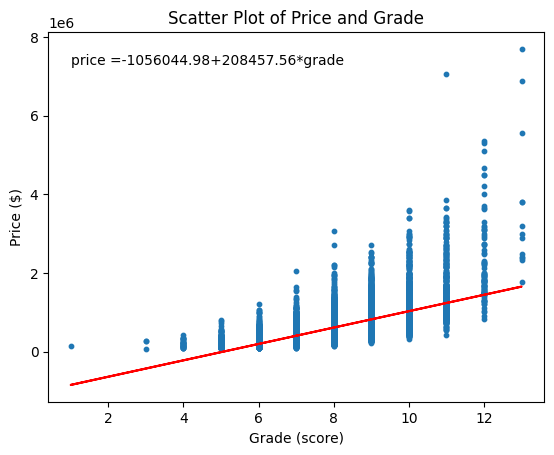

In [102]:
fig = plt.figure()
plt.scatter(df['grade'], df['price'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(df['grade'], df['price'], 1)
line = slope * df['grade'] + intercept
plt.plot(df['grade'], line, color = 'red')
plt.text(1, 7300000, ("price =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*grade"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
price_grade_corr = df['price'].corr(df['grade'])
print("correlation value =", str(round(price_grade_corr, 2)))

plt.title ('Scatter Plot of Price and Grade')
plt.xlabel('Grade (score)')
plt.ylabel('Price ($)')
plt.show()

<u>Price vs. Grade, Normalized</u>

best fit slope = 0.67
best fit intercept = -0.0
model slope = 0.67
model intercept = -0.0
model R² = 0.45
correlation value = 0.67


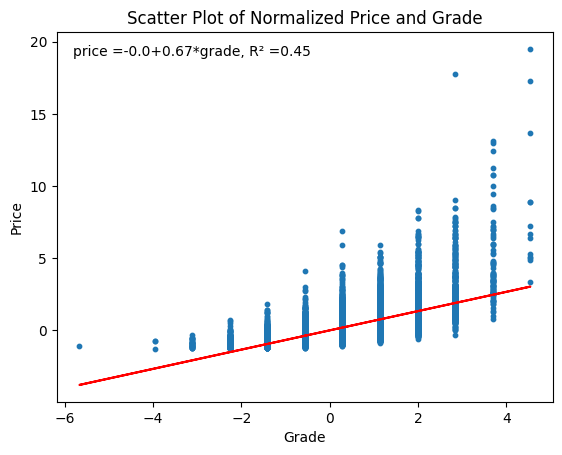

In [103]:
fig = plt.figure()
plt.scatter(z_scaled['grade'], z_scaled['price'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['grade'], z_scaled['price'], 1)
line = slope * z_scaled['grade'] + intercept
plt.plot(z_scaled['grade'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['grade']], z_scaled['price'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['grade']], z_scaled['price'])

plt.text(-5.8, 19, ("price =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*grade" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
price_grade_corr = df['price'].corr(df['grade'])
print("correlation value =", str(round(price_grade_corr, 2)))

plt.title ('Scatter Plot of Normalized Price and Grade')
plt.xlabel('Grade')
plt.ylabel('Price')
plt.show()

<u>Price vs. Area Above Ground (and Grade)</u>

best fit slope = 268.47
best fit intercept = 59953.19
correlation value = 0.61


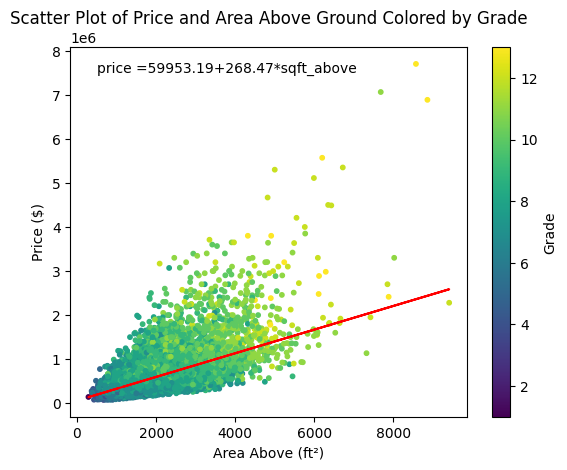

In [104]:
fig = plt.figure()
plt.scatter(df['sqft_above'], df['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_above'], df['price'], 1)
line = slope * df['sqft_above'] + intercept
plt.plot(df['sqft_above'], line, color = 'red')
plt.text(500, 7500000, ("price =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_above"))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))
price_above_corr = df['price'].corr(df['sqft_above'])
print("correlation value =", str(round(price_above_corr, 2)))

plt.title ('Scatter Plot of Price and Area Above Ground Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

<u>Price vs. Area Above Ground (and Grade), Normalized</u>

best fit slope = 0.61
best fit intercept = -0.0
model slope = 0.61
model intercept = -0.0
model R² = 0.37
correlation value = 0.61


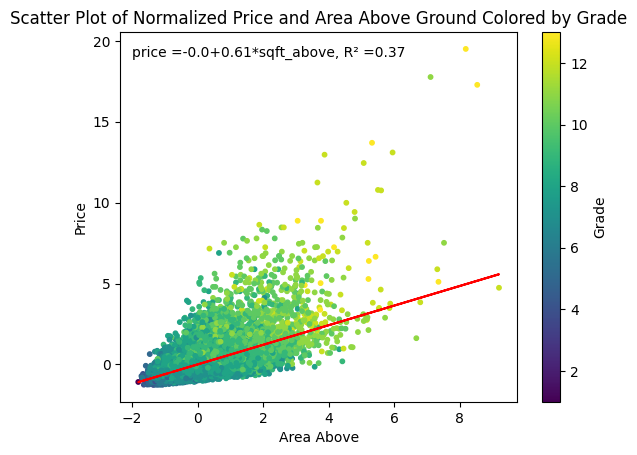

In [105]:
fig = plt.figure()
plt.scatter(z_scaled['sqft_above'], z_scaled['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_above'], z_scaled['price'], 1)
line = slope * z_scaled['sqft_above'] + intercept
plt.plot(z_scaled['sqft_above'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_above']], z_scaled['price'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_above']], z_scaled['price'])

plt.text(-2, 19, ("price =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_above" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
price_above_corr = df['price'].corr(df['sqft_above'])
print("correlation value =", str(round(price_above_corr, 2)))

plt.title ('Scatter Plot of Normalized Price and Area Above Ground Colored by Grade')
plt.xlabel('Area Above')
plt.ylabel('Price')
plt.show()

<u>Price vs. Average Area of Living Space in 15 Nearby Houses (and Grade)</u>

best fit slope = 313.56
best fit intercept = -82807.2
correlation value = 0.59


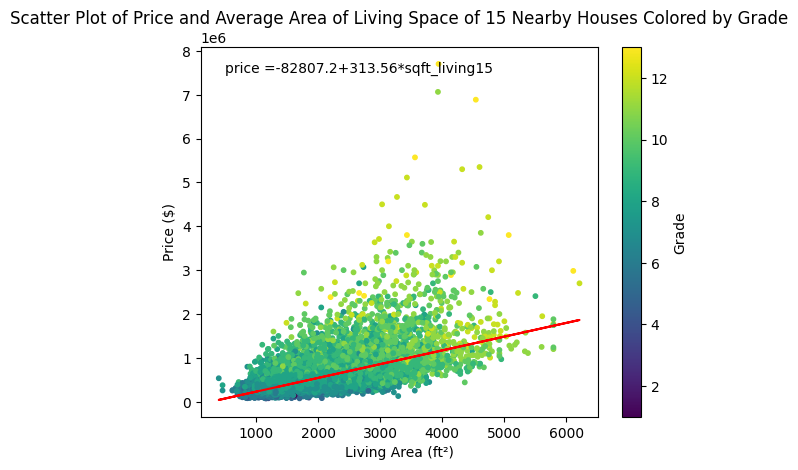

In [106]:
fig = plt.figure()
plt.scatter(df['sqft_living15'], df['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_living15'], df['price'], 1)
line = slope * df['sqft_living15'] + intercept
plt.plot(df['sqft_living15'], line, color = 'red')
plt.text(500, 7500000, ("price =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_living15"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
price_living15_corr = df['price'].corr(df['sqft_living15'])
print("correlation value =", str(round(price_living15_corr, 2)))

plt.title ('Scatter Plot of Price and Average Area of Living Space of 15 Nearby Houses Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Price ($)')
plt.show()

<u>Price vs. Average Area of Living Space in 15 Nearby Houses (and Grade), Normalized</u>

best fit slope = 0.59
best fit intercept = -0.0
model slope = 0.59
model intercept = -0.0
model R² = 0.34
correlation value = 0.59


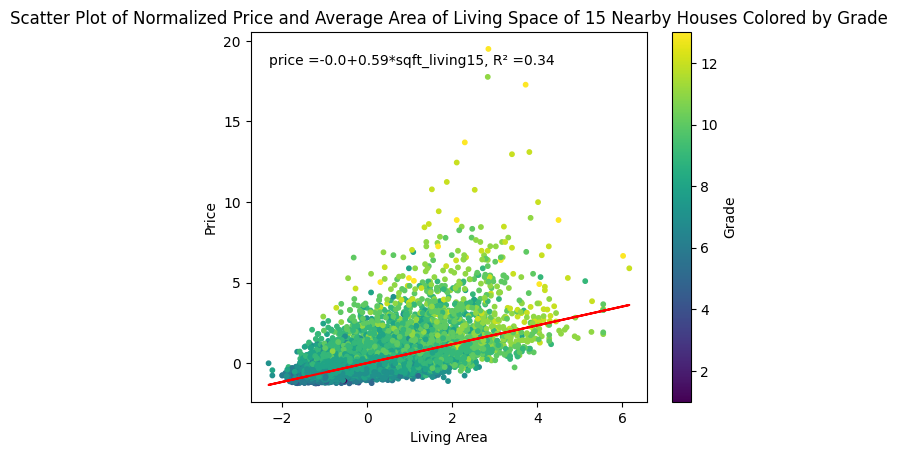

In [107]:
fig = plt.figure()
plt.scatter(z_scaled['sqft_living15'], z_scaled['price'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_living15'], z_scaled['price'], 1)
line = slope * z_scaled['sqft_living15'] + intercept
plt.plot(z_scaled['sqft_living15'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_living15']], z_scaled['price'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_living15']], z_scaled['price'])

plt.text(-2.3, 18.5, ("price =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_living15" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
price_living15_corr = df['price'].corr(df['sqft_living15'])
print("correlation value =", str(round(price_living15_corr, 2)))

plt.title ('Scatter Plot of Normalized Price and Average Area of Living Space of 15 Nearby Houses Colored by Grade')
plt.xlabel('Living Area')
plt.ylabel('Price')
plt.show()

To varying yet moderate degrees, the house prices are correlated with the area of the living space, grade, area above ground, and average area of the living space of 15 nearby houses. These, among other factors, would predictably play a role in the overall price of a house. However, the factors not included did not exhibit, at minimum, correlation values of 0.59 or greater. All of the variables graphed on the x-axis exhibited a positive relationship with price. Ultimately, the R-squared values did not exceed 0.7, which means that no single independent variable could reliably explain the variation in house prices.

<u>Area of Living Space vs. Area Above Ground (and Grade)</u>

best fit slope = 0.97
best fit intercept = 341.16
correlation value = 0.88


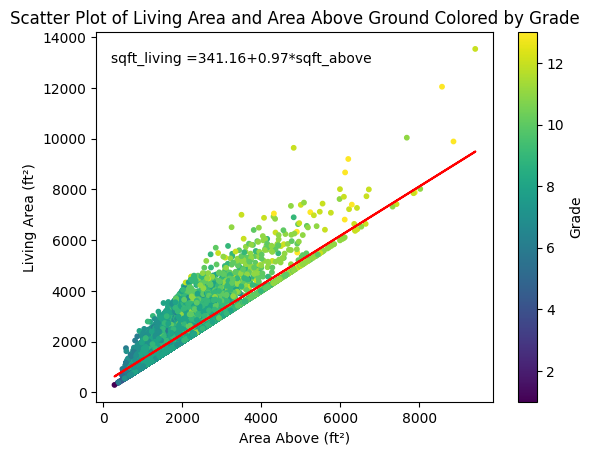

In [108]:
fig = plt.figure()
plt.scatter(df['sqft_above'], df['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_above'], df['sqft_living'], 1)
line = slope * df['sqft_above'] + intercept
plt.plot(df['sqft_above'], line, color = 'red')
plt.text(200, 13000, ("sqft_living =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_above"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
living_above_corr = df['sqft_living'].corr(df['sqft_above'])
print("correlation value =", str(round(living_above_corr, 2)))

plt.title ('Scatter Plot of Living Area and Area Above Ground Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

<u>Area of Living Space vs. Area Above Ground (and Grade), Normalized</u>

best fit slope = 0.88
best fit intercept = 0.0
model slope = 0.88
model intercept = 0.0
model R² = 0.77
correlation value = 0.88


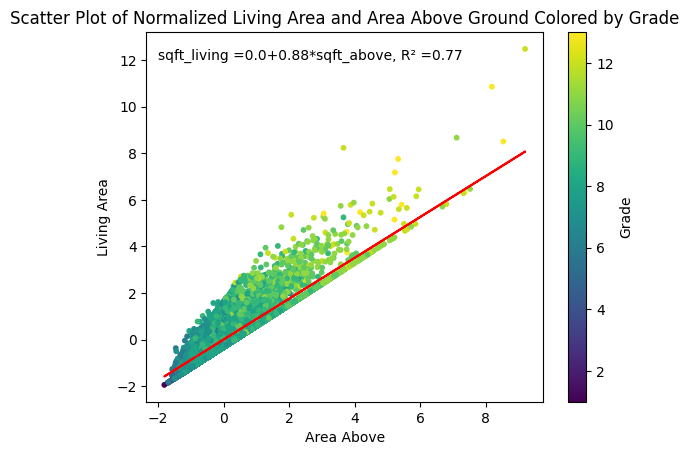

In [109]:
fig = plt.figure()
plt.scatter(z_scaled['sqft_above'], z_scaled['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_above'], z_scaled['sqft_living'], 1)
line = slope * z_scaled['sqft_above'] + intercept
plt.plot(z_scaled['sqft_above'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_above']], z_scaled['sqft_living'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_above']], z_scaled['sqft_living'])

plt.text(-2, 12, ("sqft_living =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_above" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
living_above_corr = df['sqft_living'].corr(df['sqft_above'])
print("correlation value =", str(round(living_above_corr, 2)))

plt.title ('Scatter Plot of Normalized Living Area and Area Above Ground Colored by Grade')
plt.xlabel('Area Above')
plt.ylabel('Living Area')
plt.show()

The Area of the Living Space (sqft_living) is the sum of the Area Above Ground (sqft_above) and Area of the Basement (sqft_basement). This would explain why the slope is very close to 1 and why there are no data points below those that are lined up on a presumably slope of 1.

<u>Area of Living Space vs. Grade</u>

best fit slope = 595.94
best fit intercept = -2483.11
correlation value = 0.76


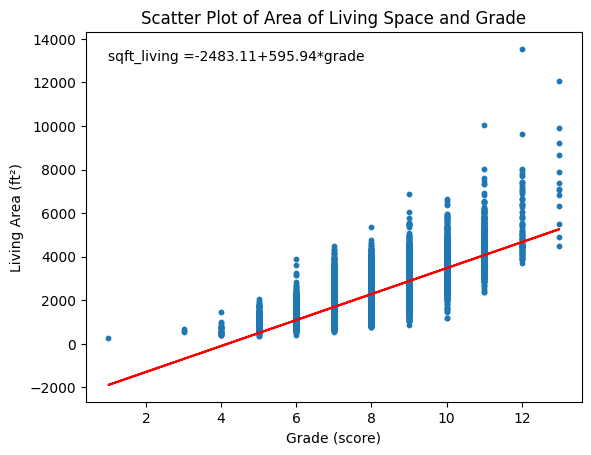

In [110]:
fig = plt.figure()
plt.scatter(df['grade'], df['sqft_living'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(df['grade'], df['sqft_living'], 1)
line = slope * df['grade'] + intercept
plt.plot(df['grade'], line, color = 'red')
plt.text(1, 13000, ("sqft_living =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*grade"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
living_grade_corr = df['sqft_living'].corr(df['grade'])
print("correlation value =", str(round(living_grade_corr, 2)))

plt.title ('Scatter Plot of Area of Living Space and Grade')
plt.xlabel('Grade (score)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

<u>Area of Living Space vs. Grade, Normalized</u>

best fit slope = 0.76
best fit intercept = 0.0
model slope = 0.76
model intercept = 0.0
model R² = 0.58
correlation value = 0.76


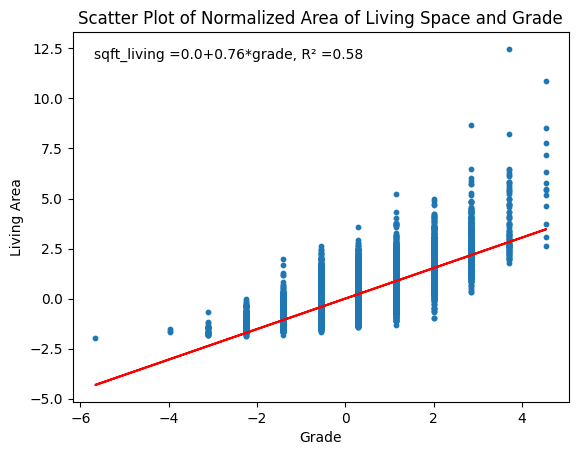

In [111]:
fig = plt.figure()
plt.scatter(z_scaled['grade'], z_scaled['sqft_living'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['grade'], z_scaled['sqft_living'], 1)
line = slope * z_scaled['grade'] + intercept
plt.plot(z_scaled['grade'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['grade']], z_scaled['sqft_living'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['grade']], z_scaled['sqft_living'])

plt.text(-5.7, 12, ("sqft_living =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*grade" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
living_grade_corr = df['sqft_living'].corr(df['grade'])
print("correlation value =", str(round(living_grade_corr, 2)))

plt.title ('Scatter Plot of Normalized Area of Living Space and Grade')
plt.xlabel('Grade')
plt.ylabel('Living Area')
plt.show()

<u>Area of Living Space vs. Average Area of Living Space of 15 Nearby Houses (and Grade)</u>

best fit slope = 1.01
best fit intercept = 66.29
correlation value = 0.76


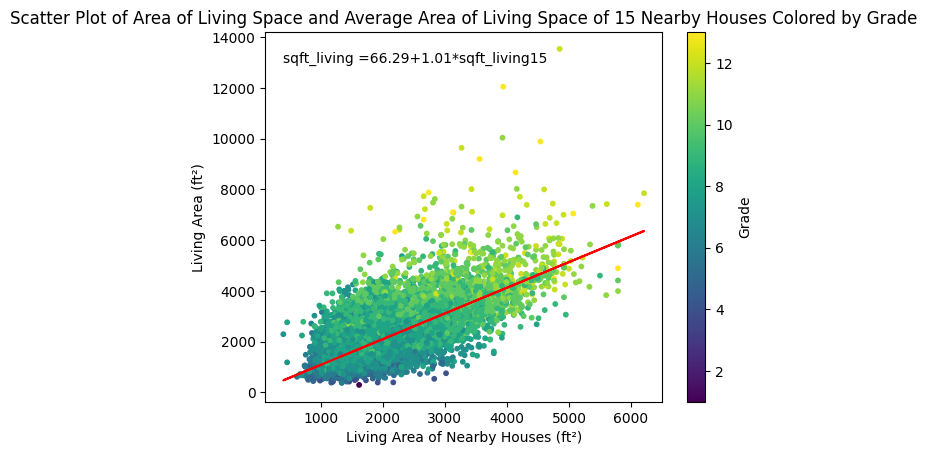

In [112]:
fig = plt.figure()
plt.scatter(df['sqft_living15'], df['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_living15'], df['sqft_living'], 1)
line = slope * df['sqft_living15'] + intercept
plt.plot(df['sqft_living15'], line, color = 'red')
plt.text(400, 13000, ("sqft_living =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_living15"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
living_living15_corr = df['sqft_living'].corr(df['sqft_living15'])
print("correlation value =", str(round(living_living15_corr, 2)))

plt.title ('Scatter Plot of Area of Living Space and Average Area of Living Space of 15 Nearby Houses Colored by Grade')
plt.xlabel('Living Area of Nearby Houses (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

<u>Area of Living Space vs. Average Area of Living Space of 15 Nearby Houses (and Grade), Normalized</u>

best fit slope = 0.76
best fit intercept = 0.0
model slope = 0.76
model intercept = 0.0
model R² = 0.57
correlation value = 0.76


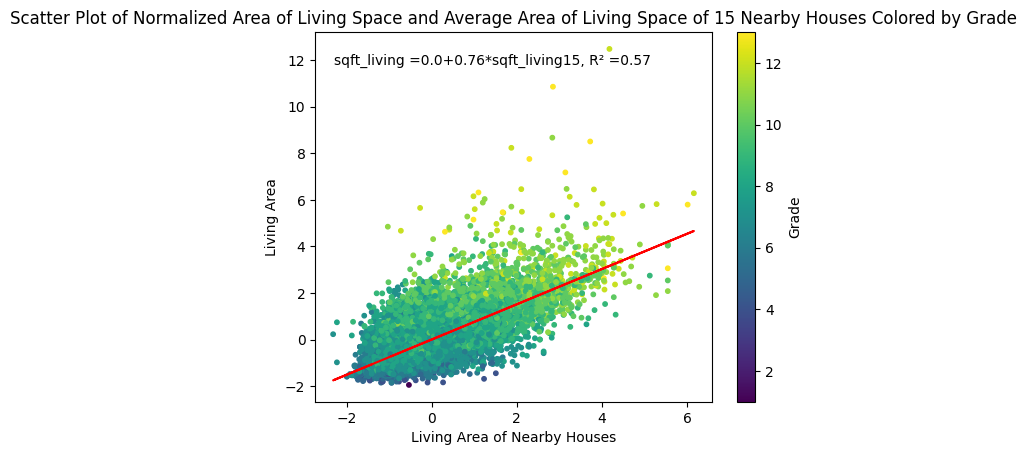

In [113]:
fig = plt.figure()
plt.scatter(z_scaled['sqft_living15'], z_scaled['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_living15'], z_scaled['sqft_living'], 1)
line = slope * z_scaled['sqft_living15'] + intercept
plt.plot(z_scaled['sqft_living15'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_living15']], z_scaled['sqft_living'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_living15']], z_scaled['sqft_living'])

plt.text(-2.3, 11.8, ("sqft_living =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_living15" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
living_living15_corr = df['sqft_living'].corr(df['sqft_living15'])
print("correlation value =", str(round(living_living15_corr, 2)))

plt.title ('Scatter Plot of Normalized Area of Living Space and Average Area of Living Space of 15 Nearby Houses Colored by Grade')
plt.xlabel('Living Area of Nearby Houses')
plt.ylabel('Living Area')
plt.show()

<u>Area of Living Space vs. Number of Bathrooms (and Grade)</u>

best fit slope = 900.43
best fit intercept = 170.77
correlation value = 0.74


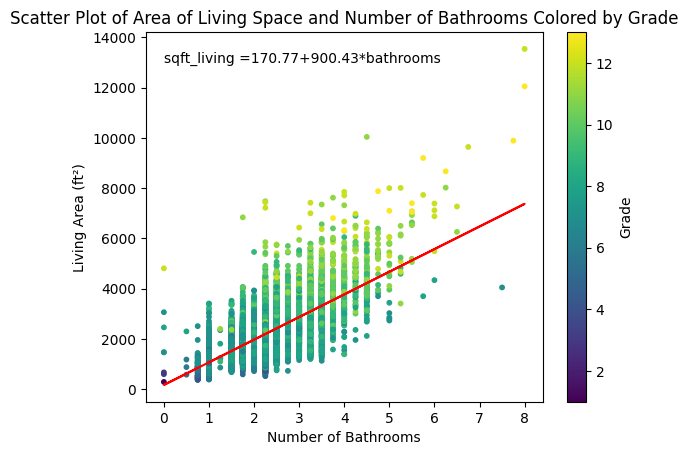

In [114]:
fig = plt.figure()
plt.scatter(df['bathrooms'], df['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['bathrooms'], df['sqft_living'], 1)
line = slope * df['bathrooms'] + intercept
plt.plot(df['bathrooms'], line, color = 'red')
plt.text(0, 13000, ("sqft_living =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*bathrooms"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
living_bathroom_corr = df['sqft_living'].corr(df['bathrooms'])
print("correlation value =", str(round(living_bathroom_corr, 2)))

plt.title ('Scatter Plot of Area of Living Space and Number of Bathrooms Colored by Grade')
plt.xlabel('Number of Bathrooms')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

<u>Area of Living Space vs. Number of Bathrooms (and Grade), Normalized</u>

best fit slope = 0.74
best fit intercept = 0.0
model slope = 0.74
model intercept = 0.0
model R² = 0.54
correlation value = 0.74


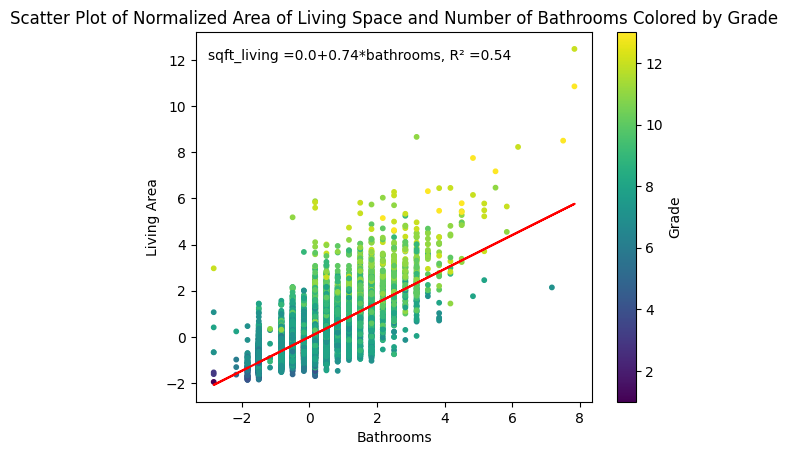

In [115]:
fig = plt.figure()
plt.scatter(z_scaled['bathrooms'], z_scaled['sqft_living'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['bathrooms'], z_scaled['sqft_living'], 1)
line = slope * z_scaled['bathrooms'] + intercept
plt.plot(z_scaled['bathrooms'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['bathrooms']], z_scaled['sqft_living'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['bathrooms']], z_scaled['sqft_living'])

plt.text(-3, 12, ("sqft_living =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*bathrooms" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
living_bathroom_corr = df['sqft_living'].corr(df['bathrooms'])
print("correlation value =", str(round(living_bathroom_corr, 2)))

plt.title ('Scatter Plot of Normalized Area of Living Space and Number of Bathrooms Colored by Grade')
plt.xlabel('Bathrooms')
plt.ylabel('Living Area')
plt.show()

To varying yet strong degrees, the living area is correlated with the area above ground, grade, average living area of 15 nearby houses, and the number of bathrooms. These, among other factors, would predictably play a role in the overall living area of a house. However, the factors not included did not exhibit, at minimum, correlation values of 0.7 or greater. As seen in the scatter plots, all of the variables graphed on the x-axis exhibited a positive relationship with living area. Ultimately, the R-squared values did not exceed 0.7, which means that no single independent variable could reliably explain the variation in living area.

<u>Lot Area vs. Average Lot Area of 15 Nearby Houses</u>

best fit slope = 1.09
best fit intercept = 1023.65
correlation value = 0.73


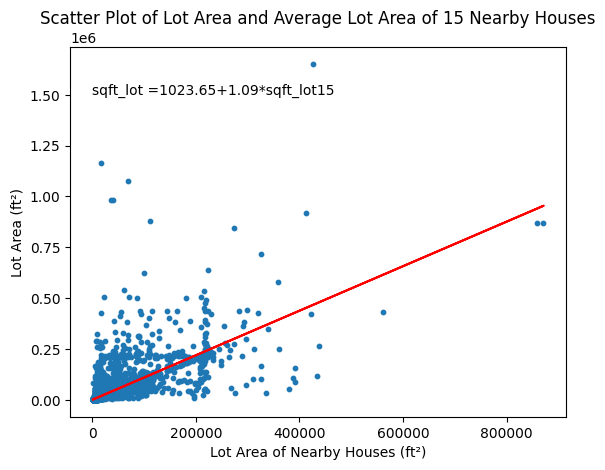

In [116]:
fig = plt.figure()
plt.scatter(df['sqft_lot15'], df['sqft_lot'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_lot15'], df['sqft_lot'], 1)
line = slope * df['sqft_lot15'] + intercept
plt.plot(df['sqft_lot15'], line, color = 'red')
plt.text(0, 1500000, ("sqft_lot =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_lot15"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
lot_lot15_corr = df['sqft_lot'].corr(df['sqft_lot15'])
print("correlation value =", str(round(lot_lot15_corr, 2)))

plt.title ('Scatter Plot of Lot Area and Average Lot Area of 15 Nearby Houses')
plt.xlabel('Lot Area of Nearby Houses (ft\u00b2)')
plt.ylabel('Lot Area (ft\u00b2)')
plt.show()

<u>Lot Area vs. Average Lot Area of 15 Nearby Houses, Normalized</u>

best fit slope = 0.73
best fit intercept = 0.0
model slope = 0.73
model intercept = 0.0
model R² = 0.54
correlation value = 0.73


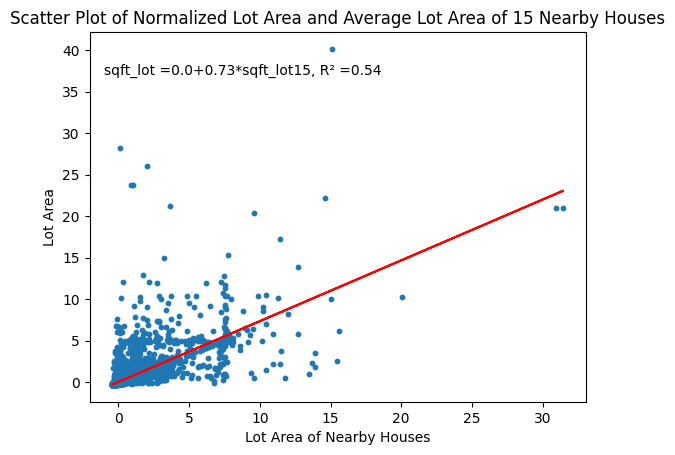

In [117]:
fig = plt.figure()
plt.scatter(z_scaled['sqft_lot15'], z_scaled['sqft_lot'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_lot15'], z_scaled['sqft_lot'], 1)
line = slope * z_scaled['sqft_lot15'] + intercept
plt.plot(z_scaled['sqft_lot15'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_lot15']], z_scaled['sqft_lot'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_lot15']], z_scaled['sqft_lot'])

plt.text(-1, 37, ("sqft_lot =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_lot15" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
lot_lot15_corr = df['sqft_lot'].corr(df['sqft_lot15'])
print("correlation value =", str(round(lot_lot15_corr, 2)))

plt.title ('Scatter Plot of Normalized Lot Area and Average Lot Area of 15 Nearby Houses')
plt.xlabel('Lot Area of Nearby Houses')
plt.ylabel('Lot Area')
plt.show()

The slope of the scatter plots help to confirm the strong positive correlation value between lot area and the lot areas of 15 nearby houses. Ultimately, the R-squared value did not exceed 0.7, which means that lot area of 15 nearby houses alone cannot reliably explain the variation in lot area. Additionally, both lot area and the average lot areas of 15 nearby houses are probably both independent variables. Even though they are likely closely related, one is not a strong predictor of the other. Therefore, this relationship may not be helpful in building a model.

<u>Average Area of Living Space of 15 Nearby Houses vs. Area of Living Space (and Grade)</u>

slope = 0.56
intercept = 812.49
correlation value = 0.76


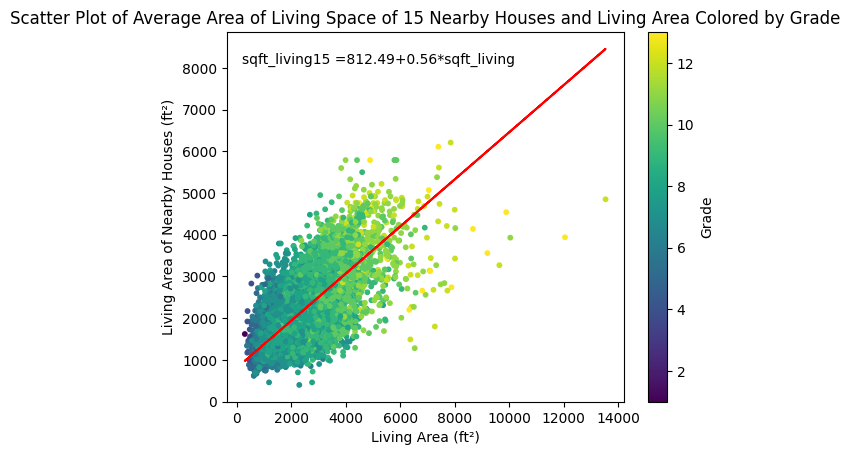

In [118]:
fig = plt.figure()
plt.scatter(df['sqft_living'], df['sqft_living15'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_living'], df['sqft_living15'], 1)
line = slope * df['sqft_living'] + intercept
plt.plot(df['sqft_living'], line, color = 'red')
plt.text(200, 8100, ("sqft_living15 =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_living"))

print("slope =", str(round(slope, 2)))
print("intercept =", str(round(intercept, 2)))
living15_living_corr = df['sqft_living15'].corr(df['sqft_living'])
print("correlation value =", str(round(living15_living_corr, 2)))

plt.title ('Scatter Plot of Average Area of Living Space of 15 Nearby Houses and Living Area Colored by Grade')
plt.xlabel('Living Area (ft\u00b2)')
plt.ylabel('Living Area of Nearby Houses (ft\u00b2)')
plt.show()

<u>Average Area of Living Space of 15 Nearby Houses vs. Area of Living Space (and Grade), Normalized</u>

best fit slope = 0.76
best fit intercept = -0.0
model slope = 0.76
model intercept = -0.0
model R² = 0.57
correlation value = 0.76


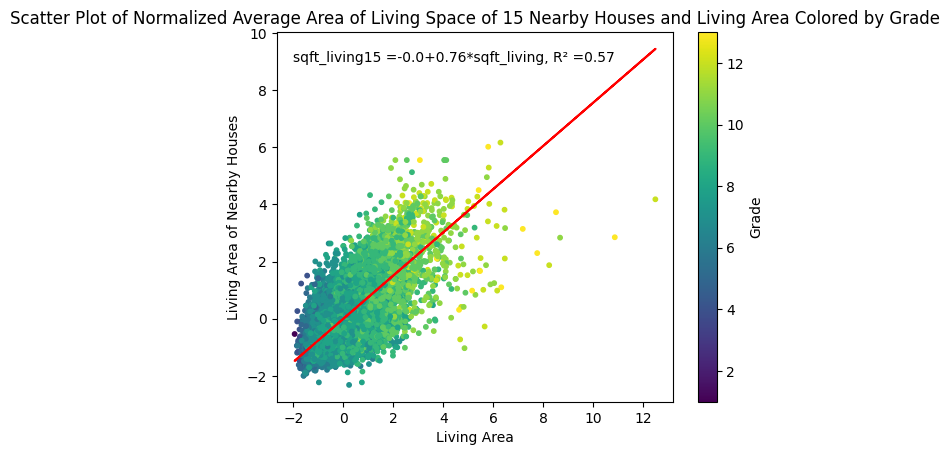

In [119]:
fig = plt.figure()
plt.scatter(z_scaled['sqft_living'], z_scaled['sqft_living15'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_living'], z_scaled['sqft_living15'], 1)
line = slope * z_scaled['sqft_living'] + intercept
plt.plot(z_scaled['sqft_living'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_living']], z_scaled['sqft_living15'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_living']], z_scaled['sqft_living15'])

plt.text(-2, 9, ("sqft_living15 =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_living" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
living15_living_corr = df['sqft_living15'].corr(df['sqft_living'])
print("correlation value =", str(round(living15_living_corr, 2)))

plt.title ('Scatter Plot of Normalized Average Area of Living Space of 15 Nearby Houses and Living Area Colored by Grade')
plt.xlabel('Living Area')
plt.ylabel('Living Area of Nearby Houses')
plt.show()

<u>Average Area of Living Space of 15 Nearby Houses vs. Area Above Ground (and Grade)</u>

best fit slope = 0.61
best fit intercept = 903.23
correlation value = 0.73


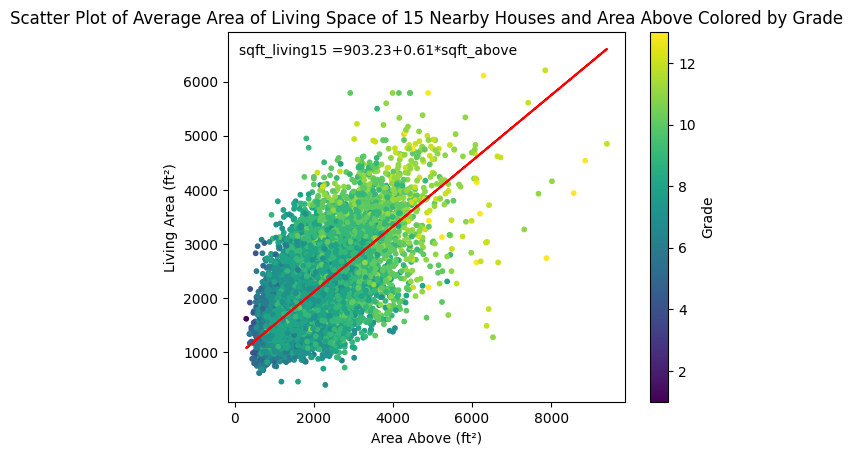

In [120]:
fig = plt.figure()
plt.scatter(df['sqft_above'], df['sqft_living15'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(df['sqft_above'], df['sqft_living15'], 1)
line = slope * df['sqft_above'] + intercept
plt.plot(df['sqft_above'], line, color = 'red')
plt.text(100, 6500, ("sqft_living15 =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*sqft_above"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
living15_above_corr = df['sqft_living15'].corr(df['sqft_above'])
print("correlation value =", str(round(living15_above_corr, 2)))

plt.title ('Scatter Plot of Average Area of Living Space of 15 Nearby Houses and Area Above Colored by Grade')
plt.xlabel('Area Above (ft\u00b2)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

<u>Average Area of Living Space of 15 Nearby Houses vs. Area Above Ground (and Grade), Normalized</u>

best fit slope = 0.73
best fit intercept = 0.0
model slope = 0.73
model intercept = -0.0
model R² = 0.54
correlation value = 0.73


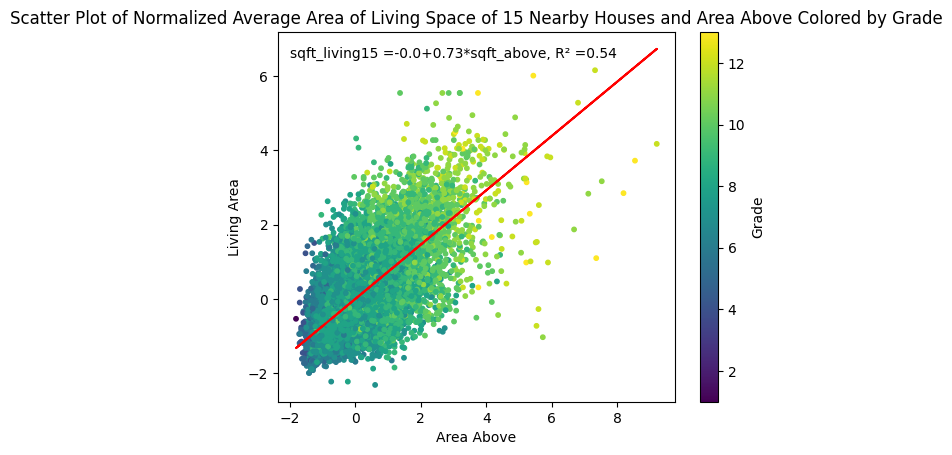

In [121]:
fig = plt.figure()
plt.scatter(z_scaled['sqft_above'], z_scaled['sqft_living15'], s = 10, c = df['grade'], cmap = 'viridis')
plt.colorbar(label = "Grade", orientation = "vertical")

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['sqft_above'], z_scaled['sqft_living15'], 1)
line = slope * z_scaled['sqft_above'] + intercept
plt.plot(z_scaled['sqft_above'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['sqft_above']], z_scaled['sqft_living15'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['sqft_above']], z_scaled['sqft_living15'])

plt.text(-2, 6.5, ("sqft_living15 =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*sqft_above" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
living15_above_corr = df['sqft_living15'].corr(df['sqft_above'])
print("correlation value =", str(round(living15_above_corr, 2)))

plt.title ('Scatter Plot of Normalized Average Area of Living Space of 15 Nearby Houses and Area Above Colored by Grade')
plt.xlabel('Area Above')
plt.ylabel('Living Area')
plt.show()

<u>Average Area of Living Space of 15 Nearby Houses vs. Grade</u>

best fit slope = 415.86
best fit intercept = -1197.61
correlation value = 0.71


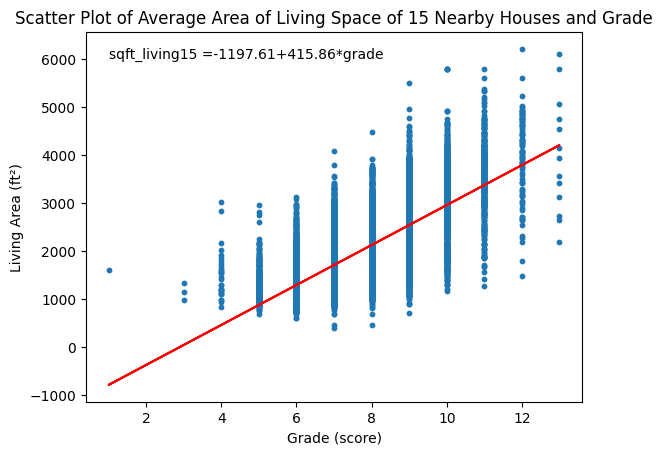

In [122]:
fig = plt.figure()
plt.scatter(df['grade'], df['sqft_living15'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(df['grade'], df['sqft_living15'], 1)
line = slope * df['grade'] + intercept
plt.plot(df['grade'], line, color = 'red')
plt.text(1, 6000, ("sqft_living15 =" + str(round(intercept, 2)) + "+" + str(round(slope, 2)) + "*grade"))

print("best fit slope =", round(slope, 2))
print("best fit intercept =", round(intercept, 2))
living15_grade_corr = df['sqft_living15'].corr(df['grade'])
print("correlation value =", str(round(living15_grade_corr, 2)))

plt.title ('Scatter Plot of Average Area of Living Space of 15 Nearby Houses and Grade')
plt.xlabel('Grade (score)')
plt.ylabel('Living Area (ft\u00b2)')
plt.show()

<u>Average Area of Living Space of 15 Nearby Houses vs. Grade, Normalized</u>

best fit slope = 0.71
best fit intercept = 0.0
model slope = 0.71
model intercept = -0.0
model R² = 0.51
correlation value = 0.71


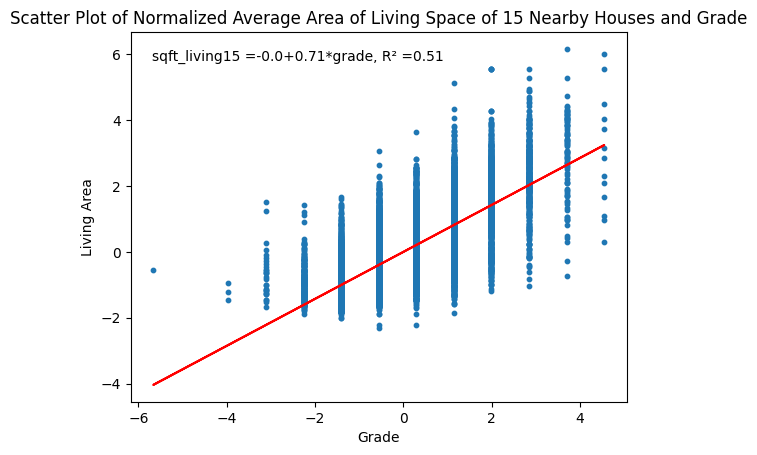

In [123]:
fig = plt.figure()
plt.scatter(z_scaled['grade'], z_scaled['sqft_living15'], s = 10)

# Calculate the line of best fit
slope, intercept = np.polyfit(z_scaled['grade'], z_scaled['sqft_living15'], 1)
line = slope * z_scaled['grade'] + intercept
plt.plot(z_scaled['grade'], line, color = 'red')

# creating a linear regression model from the normalized data
model = LinearRegression()
model.fit(z_scaled[['grade']], z_scaled['sqft_living15'])
slope_m = model.coef_[0]
intercept_m = model.intercept_
r_squared = model.score(z_scaled[['grade']], z_scaled['sqft_living15'])

plt.text(-5.7, 5.8, ("sqft_living15 =" + str(round(intercept_m, 2)) + "+" + str(round(slope_m, 2)) + "*grade" + ', R\u00b2 =' + str(round(r_squared, 2))))

print("best fit slope =", str(round(slope, 2)))
print("best fit intercept =", str(round(intercept, 2)))

print("model slope =", round(slope_m, 2))
print("model intercept =", round(intercept_m, 2))
print ('model R\u00b2 =', str(round(r_squared, 2)))
living15_grade_corr = df['sqft_living15'].corr(df['grade'])
print("correlation value =", str(round(living15_grade_corr, 2)))

plt.title ('Scatter Plot of Normalized Average Area of Living Space of 15 Nearby Houses and Grade')
plt.xlabel('Grade')
plt.ylabel('Living Area')
plt.show()

To varying yet strong degrees, the average area of the living space in 15 nearby houses is correlated with the grade, area above ground, and area of the living space. Ultimately, the R-squared values did not exceed 0.7, which means that no single independent variable could reliably explain the variation in the average area of the living space in 15 nearby houses. Additionally, all of the parameters involved are probably independent variables, which means that average area of the 15 nearby houses is not likely a dependent variable worth modeling.

# **STEP 3: DATA ANALYTICS**
## 3.1 Determine the need for a supervised or unsupervised learning method and identify dependent and independent variables



#### For this portion, we will focus on **supervised machine learning** because we have already identified our features of interest(independent variables) and our label(dependent variable). This allows us to more easily guide the ML algorithm to find specific trends and patterns within our data. This method will ensure that our model accurately predicts results for our testing data, increasing generalizability for populations outside of our sample. 

#### Due to the popularity of price prediction within the real estate industry(HelloData, 2025), our dependent variable will be **price**, and independent variables will be the features that had a moderate to strong correlation with price, or an R-squared value above |0.5|.  We decided to first try the variables with higher correlations because of their greater likelihood to influence the final results. Then, we will test the model with different features to achieve the best result. 

#### Our original features include: **the size of nearby houses, squarefoot living, squarefoot above, number of bathrooms, and grade**. However, we first must check to make sure there is no exaggerated multicollinearity that might discredit our model. 

#### Once we have ensured that the independent variables are valid to use, we will perform regression to deal with continuous data points, where classification would be inappropriate. We will test different types of regression to optimize the accuracy of our model in the next section. 

In [124]:
import numpy as np
import pandas as pd
!pip install scikit-learn
import statsmodels.api as sm
from sklearn.model_selection import train_test_split, cross_val_score, KFold #used to split the data into training and testing groups
from sklearn.linear_model import LinearRegression #we will perform linear regression using this function
from sklearn.metrics import mean_absolute_error #used for evaluating the accuracy of our ML model
from sklearn.ensemble import RandomForestRegressor #we will use this for a more reliable model build for non-linear relationships


We want to avoid multicollinearity, so let's check to make sure our features aren't too strongly correlated to one another. 

In [125]:
print(df.columns)
X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
print(X.corr())

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')
               bathrooms  sqft_living     grade  sqft_above  sqft_living15
bathrooms       1.000000     0.735542  0.648745    0.667757       0.554516
sqft_living     0.735542     1.000000  0.762704    0.876597       0.756420
grade           0.648745     0.762704  1.000000    0.755923       0.713202
sqft_above      0.667757     0.876597  0.755923    1.000000       0.731870
sqft_living15   0.554516     0.756420  0.713202    0.731870       1.000000


None of our correlations are above |0.8| which is an indications that there is no serious multicollinearity. 
Another way to check is by using Variance Inflation Factor.

In [126]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X_const = sm.add_constant(X) #add constant 

vif = pd.DataFrame()
vif["feature"] = X_const.columns
vif["VIF"] = [variance_inflation_factor(X_const.values, i) for i in range(X_const.shape[1])]

print(vif)

         feature        VIF
0          const  64.281821
1      bathrooms   2.283845
2    sqft_living   5.968997
3          grade   2.933091
4     sqft_above   4.785685
5  sqft_living15   2.676854


We can see that the variance inflation factors(VIF) are all below 5 meaning there is mild to no multicollinearity between our variables/features. Another way to test this is with a condition number using OLS, or ordinary least squares regression. 

In [127]:
import statsmodels.api as sm

y = df['price']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5146.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:01:52   Log-Likelihood:            -2.9913e+05
No. Observations:               21613   AIC:                         5.983e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.438e+05   1.35e+04    -47.590

The summary tells us that the condition number is large which could mean there is multicollinearity between our variables. However, this could be because our range of numbers is too large.
We may have to scale or standardize our features, just to check and make sure that we do not have to change our variables. 

NOTE: if multicollinearity is too high, we can either combine, switch, or get rid of one or two variables all together if they are too redundant. 

In [128]:
#Scale the data before we use our stats models to see if our condition number becomes lower
!pip install --upgrade pyarrow brotli
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaled = scaler.fit_transform(X)
print("Scaled")


Scaled


In [129]:
# Now we can once again find the condition number and see if it changes
y = df['price']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:                  price   R-squared:                       0.544
Model:                            OLS   Adj. R-squared:                  0.543
Method:                 Least Squares   F-statistic:                     5146.
Date:                Sun, 07 Dec 2025   Prob (F-statistic):               0.00
Time:                        19:01:56   Log-Likelihood:            -2.9913e+05
No. Observations:               21613   AIC:                         5.983e+05
Df Residuals:                   21607   BIC:                         5.983e+05
Df Model:                           5                                         
Covariance Type:            nonrobust                                         
                    coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------
const         -6.438e+05   1.35e+04    -47.590

The condition number did not change, so we can try dropping one of the variables. For example, as we saw in our visualizations, squarefootage of the attic and squarefootage are highly correlated, so they may be causing high pair-wise covariance.

# Drop sqft_15 from our list of independent variables to see if this changes. 
X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_living15']]
y = df['price']
model = sm.OLS(y, sm.add_constant(X)).fit()
print(model.summary())


In [130]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
import pandas as pd

X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_living15']]
vif = pd.DataFrame()
vif["Variable"] = X.columns
vif["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]
print(vif)


        Variable        VIF
0      bathrooms  20.498451
1    sqft_living  20.305414
2          grade  24.492845
3  sqft_living15  24.514960


It looks like even after dropping redundant variables, they still have high dependencies,
which means maybe we should try using a different type of regresion called ridge regression.
Instead of simple linear regression, ridge regression fixes the issue of multicollinearity, making our model more dependable.  This way, we can still incorporate all of our independent variables and include more if it works better for the model.

## 2.2 Train, test, and provide accuracy and evaluation metrics for model results

#### We will test several different types of regression: **ridge regression and random forest**. Ridge regression allows us to maintain our original features with linear regression while adjusting for multicollinearity. Random forest is better suited for variables with non-linear relationships, which we can introduce depending on the model performance.

#### Training and testing data groups will be created using cross validation, which allows us to better train our data to fit unseen or test data while reducing overfitting. We will use grid search to tune the hyperparameters in order to select the best combination of parameters before performing our random forest regression. 

#### We will evaluate performance using the **coefficient of determination(R-squared) and Mean Absolute Error(MAE)** to compare the results.

In [131]:
from sklearn.linear_model import RidgeCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline

alphas = [0.01, 0.1, 1, 10, 100, 300, 1000]

ridge_cv = make_pipeline(
    StandardScaler(),
    RidgeCV(alphas=alphas)
)

X = df[['bathrooms', 'sqft_living', 'grade', 'sqft_above', 'sqft_living15']]
y = df['price']
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

ridge_cv.fit(X_train, y_train)

# Best alpha found
best_alpha = ridge_cv.named_steps['ridgecv'].alpha_
print("Best alpha:", best_alpha)

# Model accuracy
print("Train R²:", ridge_cv.score(X_train, y_train))
print("Test R²:", ridge_cv.score(X_test, y_test))


Best alpha: 10.0
Train R²: 0.542518668839271
Test R²: 0.5465576234383317


There are strengths and weaknesses in our model. The R squared values are low, meaning we can rule out overfitting. However, our variables only
make up about 50% of the variance in the results/price. We can try to include more variables(non-redundant) that don't have as high 
correlations. 

Let's include more variables with lower correlations: bedrooms, floors, waterfront, 
views, basement, year renovated, and latitude. We will leave out variables with a correlation below 0.1 because they most likely won't have an influence on the variability. 


In [132]:
more_features = ['bedrooms', 'floors', 'waterfront', 'view', 'sqft_basement', 'yr_renovated', 'sqft_basement', 'lat']
X = df[X.columns.tolist() + more_features]

In [133]:
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42)

ridge_cv.fit(X_train, y_train)

# Best alpha found
best_alpha = ridge_cv.named_steps['ridgecv'].alpha_
print("Best alpha:", best_alpha)

# Model accuracy
print("Train R²:", ridge_cv.score(X_train, y_train))
print("Test R²:", ridge_cv.score(X_test, y_test))


Best alpha: 100.0
Train R²: 0.6584115119891709
Test R²: 0.6625598889385496


Now that we have added several more features, our R-squared values have increased. We want to optimize the r-squared values so that they are high but not too high to indicate overfitting.

Several relationships between our features and price are non-linear. Random Forest fits our model for a mix of linear and non-linear features, so we can try this method to see if this optimizes our model.

In [134]:
from sklearn.model_selection import GridSearchCV

random_forest = RandomForestRegressor(n_estimators=300, max_depth=20, random_state=0)

param_grid = {
    'n_estimators': [200, 300, 500],
    'max_depth': [10, 20, 30, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'max_features': ['auto', 'sqrt', 0.33]
}

grid = GridSearchCV(estimator=random_forest, param_grid=param_grid, cv=3, scoring='r2', n_jobs=-1, verbose=2)
grid.fit(X_train, y_train)
print("Best parameters found:")
print(grid.best_params_)

best_rf = grid.best_estimator_

Fitting 3 folds for each of 324 candidates, totalling 972 fits


C:\Users\mlmug\miniconda3\envs\ADS500B\Lib\site-packages\sklearn\model_selection\_validation.py:516: FitFailedWarning: 
324 fits failed out of a total of 972.
The score on these train-test partitions for these parameters will be set to nan.
If these failures are not expected, you can try to debug them by setting error_score='raise'.

Below are more details about the failures:
--------------------------------------------------------------------------------
227 fits failed with the following error:
Traceback (most recent call last):
  File "C:\Users\mlmug\miniconda3\envs\ADS500B\Lib\site-packages\sklearn\model_selection\_validation.py", line 859, in _fit_and_score
    estimator.fit(X_train, y_train, **fit_params)
    ~~~~~~~~~~~~~^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^^
  File "C:\Users\mlmug\miniconda3\envs\ADS500B\Lib\site-packages\sklearn\base.py", line 1358, in wrapper
    estimator._validate_params()
    ~~~~~~~~~~~~~~~~~~~~~~~~~~^^
  File "C:\Users\mlmug\miniconda3\envs\ADS500B\Lib\site-pa

Best parameters found:
{'max_depth': 20, 'max_features': 0.33, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 500}


In [135]:
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

y_train_pred = best_rf.predict(X_train)
y_test_pred = best_rf.predict(X_test)

# R²
print("Train R²:", r2_score(y_train, y_train_pred))
print("Test R²:", r2_score(y_test, y_test_pred))

# MAE
print("MAE:", mean_absolute_error(y_test, y_test_pred))

# RMSE
print("RMSE:", np.sqrt(mean_squared_error(y_test, y_test_pred)))

Train R²: 0.9696448002400455
Test R²: 0.7839194202520293
MAE: 91780.31331492904
RMSE: 180738.35129505224


Compared to the ridge regression, our random forest regressor produced a much higher R-squared value for unseen or test data(0.8) than our linear regression model(0.6). The mean absolute error is $91,100 which is the average error for predicting price. This can be explained by extremely high prices of homes, which can exaggerate the error of our predictions. Now that we have added several more features, we get a more accurate prediction for test data, meaning we can apply our model to real-world data to be used as a tool for professionals in the housing market. 

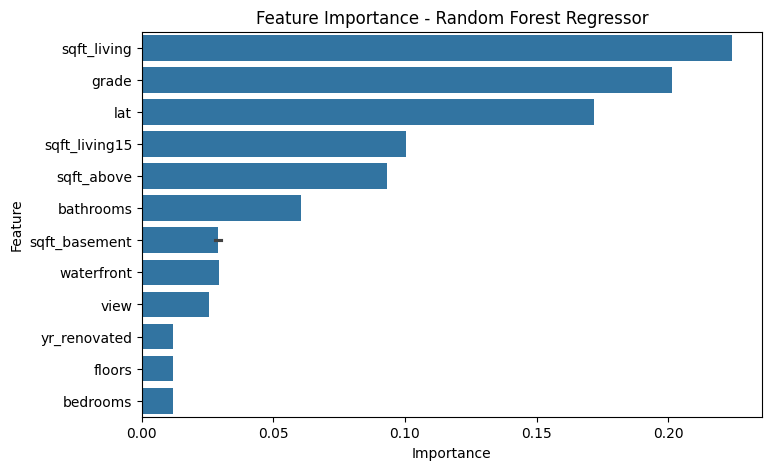

In [136]:

importances = best_rf.feature_importances_
feature_names = X_train.columns

feat_imp = pd.DataFrame({'Feature': feature_names, 'Importance': importances})
feat_imp = feat_imp.sort_values(by='Importance', ascending=False)

plt.figure(figsize=(8,5))
sns.barplot(x='Importance', y='Feature', data=feat_imp)
plt.title("Feature Importance - Random Forest Regressor")
plt.show()


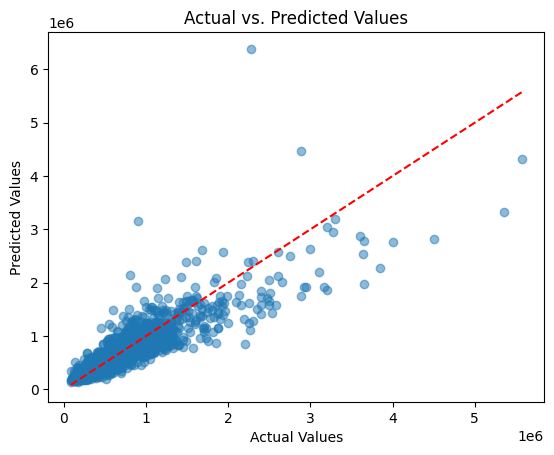

In [137]:
import matplotlib.pyplot as plt

plt.scatter(y_test, y_test_pred, alpha=0.5)
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Actual vs. Predicted Values")
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'r--')
plt.show()


# References

Bobbitt, Z. (2020, September 3). Matplotlib: How to color a scatterplot by value. Statology. https://www.statology.org/matplotlib-scatterplot-color-by-value/

Bobbitt, Z. (2022, March 24). How to calculate r-squared in python(With example). Statology. https://www.statology.org/r-squared-in-python/

Chatgpt. (n.d.). ChatGPT. Retrieved November 24, 2025, from https://chatgpt.com/

HelloData.(2025). What is regression analysis and how is it used in real estate?. Hello Data AI.Accessed via web: https://www.hellodata.ai/help-articles/what-is-regression-analysis-and-how-is-it-used-in-real-estate

How to draw a line inside a scatter plot. (2024, July 22). GeeksforGeeks. https://www.geeksforgeeks.org/data-visualization/how-to-draw-a-line-inside-a-scatter-plot/

How to standardize data in a pandas dataframe? (2021, December 16). GeeksforGeeks. https://www.geeksforgeeks.org/python/how-to-standardize-data-in-a-pandas-dataframe/

Kim J. H. (2019). Multicollinearity and misleading statistical results. Korean journal of anesthesiology, 72(6), 558–569. https://doi.org/10.4097/kja.19087

Matplotlib.pyplot.colorbar() function in Python. (2020, December 5). GeeksforGeeks. https://www.geeksforgeeks.org/python/matplotlib-pyplot-colorbar-function-in-python/

Nour, S. (2023). Beyond the Numbers, Understanding Linear Regression Modeling. Medium. Accessed via: https://medium.com/@sarah.ahmed.aboelseoud/beyond-the-numbers-understanding-linear-regression-modeling-2c9ae5697199

Pandas. Dataframe. Select_dtypes—Pandas 2. 3. 3 documentation. (n.d.). Retrieved November 24, 2025, from https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.select_dtypes.html

Scikit-Learn.(n.d.). Random Forest Regressor. Accessed via: https://scikitlearn.org/stable/modules/generated/sklearn.ensemble.RandomForestRegressor.html 

Shah, C. (2020). A Hands-On Introduction to Data Science. Cambridge: Cambridge University Press. Accessed via web: https://www.cambridge.org/highereducation/books/a-hands-on-introduction-to-data-science/9D55C29C653872F13289EA7909953842#overview 



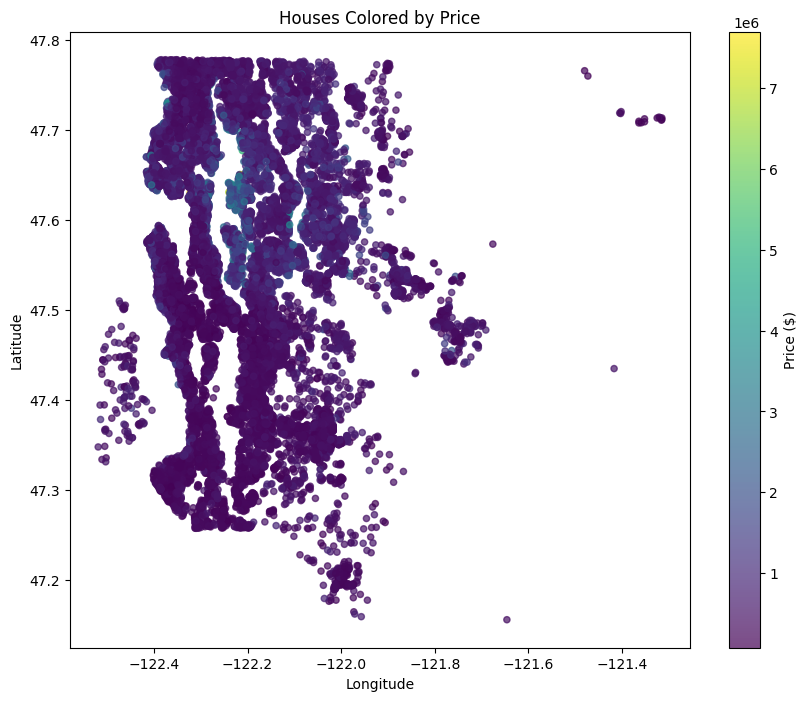

In [138]:
plt.figure(figsize=(10, 8))

# Scatter plot
sc = plt.scatter(
    df['long'],       # x-axis = longitude
    df['lat'],        # y-axis = latitude
    c=df['price'],    # color by 'price'
    cmap='viridis',         # colormap
    s=20,                   # marker size
    alpha=0.7
)

plt.colorbar(sc, label='Price ($)')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Houses Colored by Price')
plt.show()

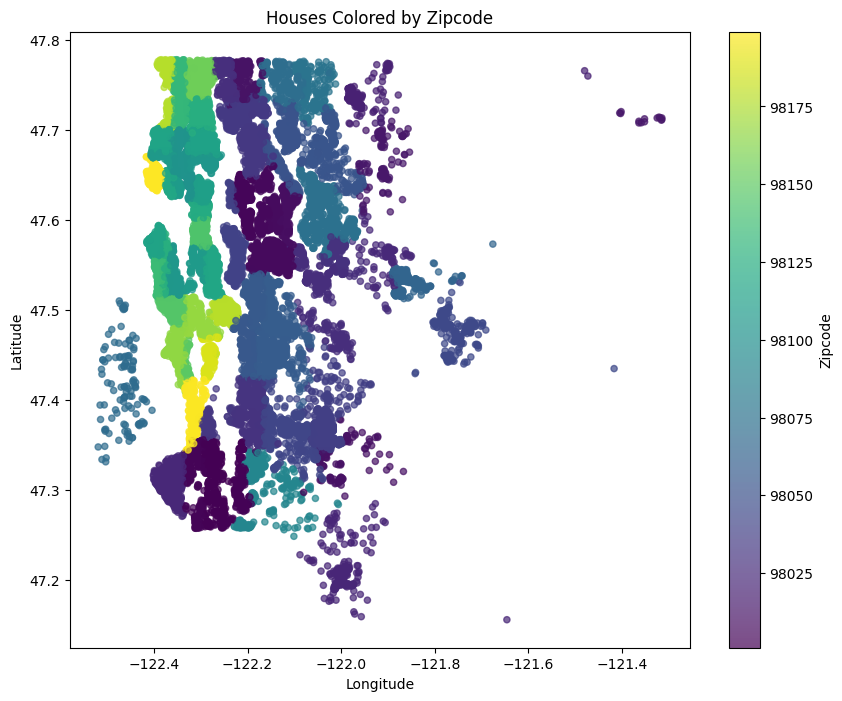

In [139]:
plt.figure(figsize=(10, 8))

# Scatter plot
sc = plt.scatter(
    df['long'],       # x-axis = longitude
    df['lat'],        # y-axis = latitude
    c=df['zipcode'],    # color by 'price'
    cmap='viridis',         # colormap
    s=20,                   # marker size
    alpha=0.7
)

plt.colorbar(sc, label='Zipcode')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.title('Houses Colored by Zipcode')
plt.show()